# **Asignatura**: Aprendizaje Automático

**Práctica 2**: Aprendizaje no supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 25 de Abril de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>María Cribillés Pérez</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Agrupamiento (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de agrupamiento, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que estos puedan agruparse en categorías o *clusters*. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365 (URL: <a href="https://www.jstor.org/stable/2347385?origin=crossref&seq=1">https://www.jstor.org/stable/2347385?origin=crossref&seq=1</a>.

## Contexto y motivación del problema

Un **géiser** es una fuente de agua caliente que, de manera intermitente, expulsa vapor y agua a presión hacia el aire. Esto ocurre cuando el agua subterránea se calienta por el magma o rocas calientes. Cuando la presión se acumula lo suficiente, el agua se libera en forma de erupción. Los géiseres son fenómenos naturales fascinantes y se pueden encontrar en lugares como Yellowstone en Estados Unidos.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg/250px-Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg" />
</center>

En particular, el conocido como *Old Faithful* es uno de los géiseres más famosos del mundo y se encuentra en el Parque Nacional Yellowstone, en Estados Unidos. Su nombre, que significa "Viejo Fiel", se debe a su regularidad en las erupciones, que ocurren aproximadamente cada 90 minutos, aunque el tiempo puede variar un poco.

Las erupciones de Old Faithful pueden alcanzar alturas de entre 30 y 55 metros, y suelen durar entre 1.5 y 5 minutos. Este géiser es conocido por su confiabilidad, lo que lo convierte en una atracción popular para los visitantes del parque. Además de su impresionante actividad, el área que lo rodea está llena de otras características geotérmicas, como fumarolas y piscinas de agua caliente.

Old Faithful ha sido objeto de estudio durante más de un siglo, y su actividad es monitorizada para entender mejor los procesos geotérmicos. Esta monitorización, a nivel básico, contempla dos tipos de medidas:

- El tiempo que transcurre entre dos erupciones consecutivas, medido en minutos.
- La duración de una erupción (en minutos).


## El conjunto de datos

El conjunto de datos que vamos a utilizar contiene 272 muestras de dos valores de monitorización del Geyser *Old Faithful* y, en particular, la duración de cada erupción (en minutos) y el tiempo transcurrido entre dos erupciones consecutivas (medido también en minutos).



El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat</a>.

**NOTA:** Para leer este conjunto de datos desde **Pandas** será necesario omitir las primeras líneas del fichero, dado que se tratan de una descripción del contenido del mismo. Se recomienda mirar el parámetro **skiprows** de **read_fwf** en la documentación (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html">https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html</a>) para leer ficheros de texto con columnas de ancho fijo.


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de identificar, si es posible, cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas. El/los modelo/s de decisión para determinar el número de categorías deberá/n ser un/os método/s de aprendizaje no supervisado para construcción de agrupamientos.

## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


**NOTA IMPORTANTE:** La clase que implementa al algoritmo DBSCAN no tiene un método ```predict()```, aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.


Esta decisión se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Pero **sí se puede usar un clasificador para ver en qué cluster está cada punto nuevo**. Hazlo con un **clasificador
kNN** sobre los $k=10$ vecinos más cercanos, utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas.

## Solución


In [1]:
#Incluimos las importaciones de librerías necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import time
import numpy as np
from sklearn import metrics
from math import floor
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Carga del conjunto de datos
import pandas as pd

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

data= pd.read_fwf(URL, skiprows=20)
data.head(5)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


Antes de empezar, aclaramos que las particiones en no supervisado no tiene sentido. Es una errata de la clasificación.

No tiene sentido hacer particiones en aprendizaje no supervisado.

## Análisis descriptivo del problema y análisis expoloratiorio de los datos

Antes de empezar a modelar y obtener características sobre el Geyser, vamos a estudiar un poco los datos iniciales sin realizar ningún cambio. Vamos a intentar entender cómo se representan los datos y cómo se comportan, tanto visual como estadísticamente.

In [3]:
#Columnas del dataset
data.columns

Index(['Unnamed: 0', 'eruptions', 'waiting'], dtype='object')

Vemos que tenemos en total 3 columnas.

Primero de todo, vamos a cambiarle el nombre de las columnas ya que son poco representativas, de hecho, la primera no tiene ni nombre asignado (unnamed).
Cambio de nombres de las columnas:



*   Unnamed por Index: es el número de las erupciones
*   Eruptions por Tiempo_erupcion: es el tiempo que dura una erupcion (minutos)
*   Waiting por Espera: es el tiempo de espera que hay entre erupciones (minutos)



In [4]:
#Renombramos el nombre de las columnas para que sea representativo
data.columns = ['Indice', 'Tiempo_erupcion', 'Espera']

In [5]:
#Funcion que nos da información sobre el dataset data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Indice           272 non-null    int64  
 1   Tiempo_erupcion  272 non-null    float64
 2   Espera           272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB
None


Podemos observar los tipos de las columnas. Como es natural, el índice es un entero ya que son números cardinales. Sin embargo, vemos que tanto el tiempo de erupcion y espera se miden en minutos pero uno es entero y otro es float. Esto significa que el tiempo de las erupciones está en minutos pero con decimales, mientras que las esperas están en minutos enteros.

In [6]:
#Estadísticas descriptivas
#funcion describe() de pandas que nos describe numericamente los datos del dataframe
print("Estadísticas descriptivas:")
print(data.describe())

Estadísticas descriptivas:
           Indice  Tiempo_erupcion      Espera
count  272.000000       272.000000  272.000000
mean    29.746324         3.487783   70.897059
std     23.449679         1.141371   13.594974
min      1.000000         1.600000   43.000000
25%     15.000000         2.162750   58.000000
50%     21.000000         4.000000   76.000000
75%     31.250000         4.454250   82.000000
max     99.000000         5.100000   96.000000


Podemos ver que no tiene missing values porque en todas tiene 272 instancias, lo que hemos visto en la función anterior también.

Vamos a interpretar las estadísiticas de tiempo de erupción y la espera entre erupciones. Como estas dos variables están medidas en minutos, sus estadísticas también son minutos.

Observando el tiempo de erupción, tiene una media algo menor que la mediana, por lo que puede deberse a una ligera asimetría para la izquierda. De media sulen ruar unos 3.49 minutos. La duración mínima registrada es de 1.6 minutos y la máxima de 5.1 minutos, por lo que hay un poco de todo, no es tan homogéneo.

En cuanto al tiempo de espera, vuelve a pasar un poco lo mismo ya que la media (70.9 minutos de espera) es algo menor que la mediana (76 minutos de espera), por lo que puede volver a signinficar una leve asimetría hacia valores más bajos. El rango de espera es amplio ya que nos podemos encontrar una espera desde 43 a 96 minutos.




Si nos fijamos en la columna índice, hay un dato extraño y que tenemos que ver exactamente por qué ocurre. Hemos visto que hay 272 instancias, pero el máximo del índice es 99, es decir, hay número repetidos. Veamos el dataset entero para darnos cuenta:

In [7]:
# Vemos el dataset entero
data

,Indice,Tiempo_erupcion,Espera
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,26,4.117,81
268,26,2.150,46
269,27,4.417,90
270,27,1.817,46


Vemos como empiezan a repetirse los índices, por lo que no nos da ninguna informacion esa columna y la podemos quitar.

In [8]:
# Eliminamos la columna 'Indice' porque los numeros están repetidos y no nos aporta información
data = data.drop(columns=['Indice'])


Vamos a comprobar las estadísticas matemáticas de una forma más gráfica con la distribución de valores con sus histogramas.

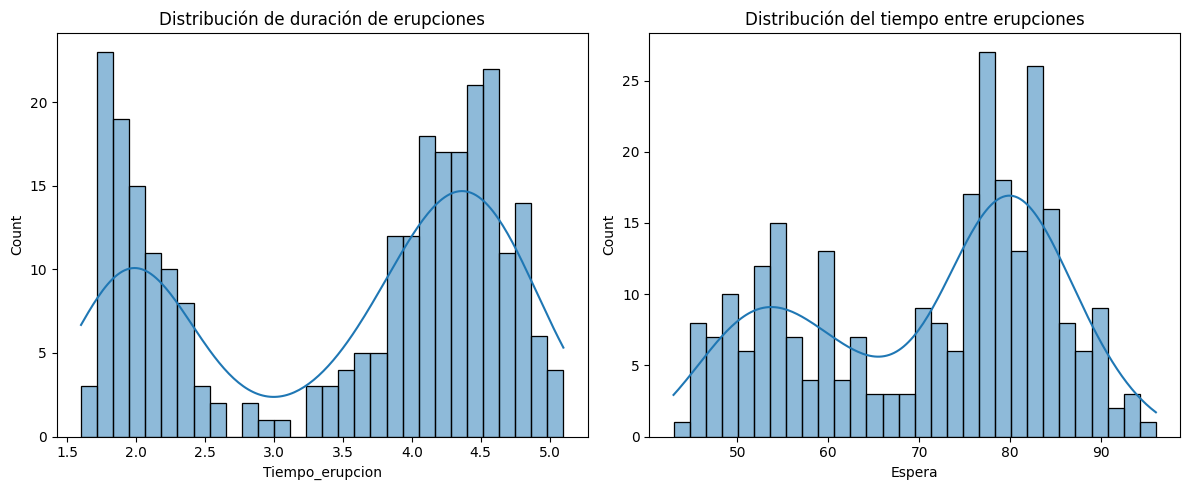

In [9]:
# Histograma de cada variable
plt.figure(figsize=(12, 5)) #creamos una figura base para los graficos de 12 de ancho y 5 de alto
plt.subplot(1, 2, 1) #creamos el primer subplot con 1 fila, 2 columnas y es el numero 1 de graficos (el de la izquierda)
sns.histplot(data['Tiempo_erupcion'], kde=True, bins=30) #dibuja histograma de la variable Tiempo_erupcion y lo divide en 30 intervalos con una linea estimando la distribucion (kde)
plt.title('Distribución de duración de erupciones') #le añadimos titulo

plt.subplot(1, 2, 2)#creamos el segundo subplot con 1 fila, 2 columnas y es el numero 2 de graficos (el de la derecha)
sns.histplot(data['Espera'], kde=True, bins=30) #dibuja histograma de la variable Espera y lo divide en 30 intervalos con una linea estimando la distribucion (kde)
plt.title('Distribución del tiempo entre erupciones') #le añadimos titulo
plt.tight_layout() #ajusta automaticamente el espacio entre subplots
plt.show() #muestra la figura creada

En cuanto a la distribución de la duración de las erupciones, observamos una distribución bimodal con dos picos. El primero está alrededor de los dos minutos y el segundo alrededor de los cuatro minutos y medio. Por tanto, podemos llegar a pensar que hay dos tipos de erupciones, unas cortas y otras largas. El pico de la izquierda está más pronunciado, de ahí concuerda que la mediana sea ligeramente más baja que la media. Podemos llegar a pensar que se va a dividir en dos clústers.

Por otro lado, sobre la distribución del tiempo entre erupciones, podemos comentar que puede haber otra bimodal pero mucho menos marcada. El primer pico podría estar sobre los 55 minutos de espera y el segundo sobre los 80 minutos. Por tanto, podríamos seguir pensando que puede haber dos clústers bien diferenciados.

Como solo tenemos dos variables, podemos hacer un diagrama de dispersión (scatter plot) y ver visualmente la relación entre éstas dos. Nos puedo permitir ver tendencias, agrupamientos naturales, subgrupos separados...

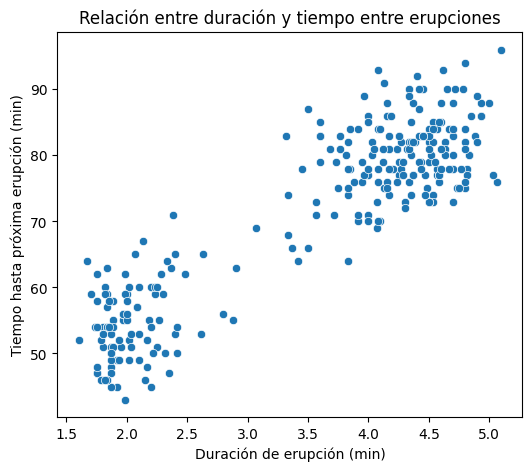

In [10]:
# Diagrama de dispersión entre las dos variables
plt.figure(figsize=(6, 5)) #creamos una figura de 6 de ancho y 5 de alto
sns.scatterplot(x='Tiempo_erupcion', y='Espera', data=data) #genera un diagrama de dispersión
plt.title('Relación entre duración y tiempo entre erupciones') #añadimos título
plt.xlabel('Duración de erupción (min)') #nombre al eje X
plt.ylabel('Tiempo hasta próxima erupción (min)') #nombre al eje Y
plt.show() #enseñamos el plot

Podemos observar dos grupos claramente separados a falta de algunas instancias que son más centrales. El primer grupo (abajo a la izquierda), tiene duraciones cortas y tiempos de espera cortos, mientras que el otro grupo (arriba a la derecha) tiene duraciones más largas y tiempo de espera más largos. Por tanto, podríamos pensar que las dos variables están correladas matemáticamente. Es decir, que cuanto más baja es la duración de la erupción, más bajo es el tiempo de espera entre erupciones y viceversa.

En el centro se quedan unas cuantas instancias, pero son bastante pocas.

Por tanto, esto vuelve a corroborar toda la información obtenida antes, ya que veíamos una distribución bimodal.

Para terminar esta sección, vamos a comprobar la correlación directa que hemos visto en el gráfico de dispersión con la matriz de correlación (son números las dos variables a estudiar):

                 Tiempo_erupcion    Espera
Tiempo_erupcion         1.000000  0.900811
Espera                  0.900811  1.000000


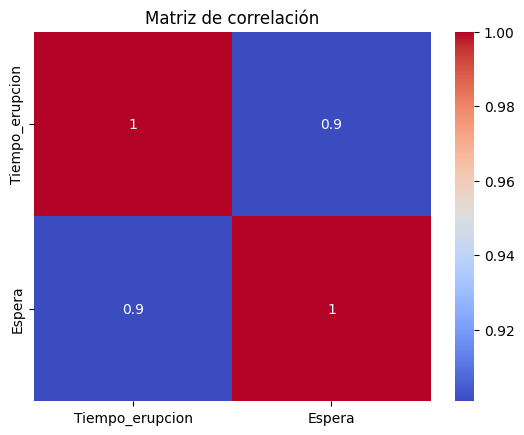

In [11]:
# Matriz de correlación
#corr(): calcula la matriz de correlación entre todas las variables numéricas del dataframe
#heatmap(): genera un mapa de calor de la matriz de correlación:
  #annot=True muestra los valores numéricos en cada celda
  #cmap='coolwarm': colores azul y rojo
print(data[['Tiempo_erupcion', 'Espera']].corr()) #calculamos la matriz de correlacion

sns.heatmap(data[['Tiempo_erupcion', 'Espera']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

Los coeficientes de correlación van desde el -1 al 1 donde el 1 representa la máxima correlación directa, el -1 la máxima correlación indirecta y el 0 significa que no están correladas. Esto sigue el código de colores, de hecho, la leyenda de la derecha lo explica.

Efectivamente nos da la misma idea. Existe una correlación positiva casi directa entre las dos variables. En general, cuanto más dura la erupción, más tarda en ser la siguiente.

## Preprocesado de datos
Vamos a preparar un poco los datos antes de entrenar ya que suele ser mejor tener buenos datos para que den buenos resultados. Vamos a plantear los siguientes apartados:

*   Selección y extracción de características
*   Reducción de dimensionalidad
*   Outliers
*   Missing values
*   Escalado de variables
*   Codificación y transformación de datos
*   Desbalanceo de datos




### Selección, extracción de características y reducción de dimensionalidad

Hemos estudiado y visto que hay una correlación casi directa entre las dos variables que tenemos. Sin embargo, al tener solo dos no es recomendable una reducción de la dimensionalidad.

### Outliers
Un valor atípico (outlier) son datos que se desvían significativamente del resto de los datos. Puede ser mucho más alto o mucho más bajo que los demás puntos de datos. Esto puede hacer que se desvie el ajuste del modelo.

Pueden  ser errores de medición o de ejecución.

Hay más métodos paa detectar outliers, como el Z-score, pero nosotros vamos a usar uno de los métodos más comunes: método del rango intercuartílico (IQR): es una medida de dispersión estadística que se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1):
$$ IQR=Q3−Q1 $$

Donde el primer cuartil (Q1) representa el valor que deja el 25% de los datos por debajo de él y el tercer cuartil (Q3) representa el valor que deja el 75% de los datos por debajo de él. Por tanto, el IQR representa el rango en el que se encuentra el 50% central de los datos.

Ahora, tenemos que definir un umbral para considerar a una instancia outlier. Se define una cota inferior y una cota superior de la siguiente forma:

 $$Lim\_inf=Q1−1.5×IQR$$

 $$Lim\_sup=Q3+1.5×IQR$$

 Cualquiera instancia fuera de esos límites se considerará un outlier.


En clustering también es importante estudiarlos porque podemos aplicar modelos basados en distancias como el KMeans y si hay muchos outliers puede desplazar el centroide de un cluster equivocadamente. Aun así, hay modelos que ya distinguen puntos como outliers, como puede ser el DBSCAN.

In [12]:
# Calculamos el IQR para ambas variables
Q1 = data.quantile(0.25) #primer cuartil del 25
Q3 = data.quantile(0.75) #cuartil del 75
IQR = Q3 - Q1 #nos quedamos con la parte central: rango intercuartilico

# Definimos outliers como valores fuera de 1.5*IQR
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostramos cuantos outliers tenemos
print("Número de outliers detectados:", outliers.sum())

Número de outliers detectados: 0


Vemos como no tenemos outliers, por lo que no tenemos que hacer nada más en este apartado.

### Missing values
Ya lo hemos visto anteriormente que no había valores perdidos pero vamos a ratificarlo una vez más.

In [13]:
#Missing values (son los que son null)
print("Valores faltantes por columna:")
print(data.isnull().sum()) #vemos cuales están vacías y las sumamos para ver el total

Valores faltantes por columna:
Tiempo_erupcion    0
Espera             0
dtype: int64


Efectivamente no hay valores perdidos.

### Escalado de variables

El escalado de variables es importante para algoritmos que utilizan distancias, como el KMeans o DBSCAN. Como hemos podido comprobar antes, no todas las variables numéricas están en la misma escala ni mismo rango, por lo que las variables que sean más grande tendrán más peso. Pero no queremos esto, queremos que todas tengan la misma importancia, por lo que tendremos que ponerlas en el mismo rango.

Las dos opciones más comunes para el escalado de variables es: StandardScaler y MinMaxScaler.



StandardScaler transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Sigue la fórmula:

$$
    z = \frac{x - \mu}{\sigma}
$$

donde

*   $x$: valor original.
*   $\mu$: media de la columna.
*   $\sigma$: desviación estándar de la columna.

Así conseguiríamos que los datos estuviesen centrados en la media alrededor de 0 y que tengan desviación típica 1. Además, podrían haber números negativos o mayores que 1, por lo que no están limitados a un rango. Esto hacer que sea menos sensibles a outliers.

Este tipo se suele utilizar cuando creemos que lso datos siguen una distribución normal o son datos simétricos.








En cuanto a MinMaxScaler: transforma los datos paar que estén en un rango, suele ser entre 0 y 1.

La fórmula que utiliza es:
$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Se usa cuando hay una distribución asimétrica o cuando no siguen distribución normal.

Como hemos visto que puede serguir una distribución bimodal, veo más recomendable hacer el MinMaxScaler:

In [14]:
# Normalizacion MinMax
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

In [15]:
X_scaled

array([[0.57142857, 0.67924528],
       [0.05714286, 0.20754717],
       [0.49514286, 0.58490566],
       [0.19514286, 0.35849057],
       [0.838     , 0.79245283],
       [0.36657143, 0.22641509],
       [0.88571429, 0.8490566 ],
       [0.57142857, 0.79245283],
       [0.1       , 0.1509434 ],
       [0.78571429, 0.79245283],
       [0.06657143, 0.20754717],
       [0.662     , 0.77358491],
       [0.74285714, 0.66037736],
       [0.04285714, 0.0754717 ],
       [0.88571429, 0.75471698],
       [0.162     , 0.16981132],
       [0.04285714, 0.35849057],
       [0.91428571, 0.77358491],
       [0.        , 0.16981132],
       [0.75714286, 0.67924528],
       [0.05714286, 0.1509434 ],
       [0.04285714, 0.0754717 ],
       [0.52857143, 0.66037736],
       [0.41914286, 0.49056604],
       [0.838     , 0.58490566],
       [0.57142857, 0.75471698],
       [0.10485714, 0.22641509],
       [0.70942857, 0.62264151],
       [0.64285714, 0.66037736],
       [0.80942857, 0.67924528],
       [0.

Efectivamente se queda en el intervalo $[0,1]$.

### Codificación y transformación de datos

No tenemos variables categóricas en este dataset por lo que no tenemos que hacer este paso.

### Desbalanceo de datos
En clustering no tenemos clases, por lo que no podemos aplicar esta técnica como tal.

## Métricas de evaluación

Al estar trabajando con un problema de clustering, no conocemos cual es la etiqueta de los datos y, por tanto, no podemos hacer como en la práctica anterior ver si nos hemos equivocado o no prediciendo las clases. Para evaluar el modelo tenemos que analizar las características del modelo obtenido y mirar medidas que muestran como de buena ha sido la segmentación. Para ello nos basamos en distancias, separaciones y densidades (dependiendo del modelo) de los clúster que nos han dado como resultado. En este caso vamos a utilizar las siguientes métricas:

* **Tiempo de ejecución**: en segundos
* **Coeficiente Silhouette**: mide la cohesión dentro de un clúster y la separación entre clusters. El valor $s(i)$ de un objeto indica cómo de bien está asignado a su clúster comparado con otros clusters. Un valor cercano a 1 indica que el objeto está bien asignado, mientras que un valor cercano a 0 indica que está en el borde de dos clusters. Lo definimos matemáticamente:
    
Dado un punto $x$ en el conjunto de datos, se define $a(x)$ como la distancia promedio de $x$ a todos los demás puntos en el mismo clúster, y $b(x)$ como la distancia promedio de $x$ a todos los puntos en el clúster más cercano. El coeficiente de Silhouette para el punto $x$ se define como
$$ s(x) = \frac{b(x)-a(x)}{\max\{a(x),b(x)\}} $$

Este coeficiente puede tomar valores entre $-1$ y $1$. Los valores próximos a $1$ indican un buen agrupamiento, pues el coeficiente $b(x)$ será bastante mayor que $a(x)$, mientras que los valores próximos a $-1$ indicarán un mal agrupamiento. Los valores cercanos a $0$ indican superposición. El coeficiente Silhouette para toda la muestra se define como la media de los coeficientes de todos los puntos, es decir,
$$ S = \frac{1}{N} \sum_{i=1}^N s(x_i) $$

Ventajas: está acotado entre $-1$ y $1$, indicando un mejor agrupamiento cuanto mayor es el índice.

Inconvenientes: suele beneficiar a los clústeres convexos. Necesita mucha memoria.

* **Índice de Calinski-Harabasz**: Mide la varianza inter-clusters comparada con la varianza intra-clusters. Cuanto mayor sea esta razón, mejor es el clustering. Más concretamente, este índice proporciona el cociente de dispersión entre datos entre distintos clústeres y los datos en un mismo clúster. Para k clústeres y N datos, se define como:
$$ CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{N - k}{k - 1} $$

Donde $B_k$ y $W_k$ son matrices que representan la dispersión entre distintos clústeres y en el mismo clúster, respectivamente. Se definen por:
$$ W_k = \sum_{q=1}^k \sum_{x \in C_q} (x - c_q)(x - c_q)^T, \quad B_k = \sum_{q=1}^k n_q (c_q - c)(c_q - c)^T $$

Donde $C_q$ es el conjunto de puntos del clúster $q$, $c_q$ es el centro de dicho clúster, $n_q$ su cardinal, y $c$ el centro del conjunto de datos.

Ventajas: El índice aumenta cuando los clústeres son densos y están bien separados. Además, es fácil de computar.

Inconvenientes: Al igual que Silhouette, suele beneficiar la convexidad. No está acotado.

Las he encapsulado en funciones:

In [16]:
#Para imprimir las metricas y evaluar un cluster con el indice de Calinski-Harabasz y el coeficiente de Silhouette
def evaluar_cluster(modelo, X, predicciones):
    metric_CH = metrics.calinski_harabasz_score(X, predicciones)
    metric_SC = metrics.silhouette_score(
        X, predicciones, metric='euclidean',
        sample_size=floor(0.2 * len(X)) if len(X) > 10000 else len(X), random_state=123456
    )
    print(f"Calinski-Harabasz Index: {metric_CH:.3f}, Silhouette Coefficient: {metric_SC:.5f}")

## Algoritmos de agrupamiento: KMeans y DBSCAN

La práctica anterior nos centrabamos en clasificar instancias y después comprobar que coincidían con la etiqueta preasginada. Sin embargo, en apredinzaje no supervisado no tenemos esas etiquetas, es decir, tenemos datos pero no clasificados. Por tanto, nuestra tarea es identificar instancias similares y asignarlas a clusters, o grupos de instancias similares. Al igual que en la clasificación, cada instancia se asigna a
un grupo. Sin embargo, a diferencia de la clasificación, el clustering es una tarea no supervisada.

**KMeans**: es un algoritmo sencillo capaz de agrupar este tipo de conjuntos de
datos de forma muy rápida y eficaz, a menudo en sólo unas pocas iteraciones. Es un método basado en particionamiento, es decir, construyen una partición de la base de datos formada por n objetos en un conjunto de k clusters. Por tanto, lo que hacemos es fijar un número k de clusters, y se escogen inicialmente k centros para los clusters. Se necesita como parámetro de entrada el número de clusters deseado. En cada iteración, a cada dato se le asigna el clúster asociado al centro que tiene a menor distancia. Al acabar cada iteración, los centros se mueven al valor medio de los datos pertenecientes al clúster. El algoritmo termina cuando en una iteración no hay ningún cambio de clúster.

La complejidad computacional del algoritmo suele ser lineal con respecto al número de instancias m, el número de conglomerados k y el número de dimensiones n. Sin embargo, esto sólo es cierto cuando los datos tienen una estructura de conglomerados. Si no es así, en el peor de los casos la complejidad puede aumentar exponencialmente con el número de instancias. En la práctica, esto rara vez ocurre, y k-means suele ser uno de los algoritmos de clustering más rápidos.
    
Inconvenientes: se asume que los clusters son convexos e isótropos, sensible a ruido y outliers, necesaria una medida (por tanto no sabría que hacer con los nominales) y tiene la necesidad de fijar anticipadamente el número de clusters k.
    
Ventajas: es relativamente eficiente y con frecuencia suele alcanzar óptimos locales, dependiendo de la elección inicial de los centros de clusters.

**DBSCAN (agrupación espacial de aplicaciones con ruido basado en
la densidad)**: define los clusters como regiones continuas de alta
densidad. Es otro método basado en particionamiento, pero no usa centroides. Este algoritmo ve los clusters como áreas de alta densidad separadas por áreas de baja densidad. A los ejemplos que están en las áreas de alta densidad se les llama core samples. A partir de un punto, va buscando otros puntos en su vecindad y uniéndolos al clúster hasta que no se alcancen más puntos. El resto de ejemplos serán considerados outliers por el algoritmo. Este algoritmo funciona bien si todos los clusters están bien separados
por regiones de baja densidad. DBSCAN es un algoritmo muy sencillo pero potente, capaz de identificar cualquier número de conglomerados de cualquier forma.
Es robusto frente a valores atípicos y solo tiene dos hiperparámetros
(eps y min_samples). Sin embargo, si la densidad varía significativamente entre los conglomerados, o si no hay una región de densidad suficientemente baja alrededor de algunos conglomerados, DBSCAN puede tener dificultades para capturar todos los conglomerados correctamente. Además, su complejidad computacional es aproximadamente $O(m^2
n)$, por lo que no se adapta bien a grandes conjuntos de datos
    
Ventajas: no tiene un numero prefijado de clusters, los clusters pueden tomar cualquier forma. Además, es robusto a outliers. De algoritmos vistos, es el único que no se limita a establecer una partición del conjunto de ejemplos.
    
Inconvenientes: es necesario determinar los parámetros que definen la densidad de forma adecuada. Puede ser complejo computacionalmente. Si la densidad varía mucho puede no capturar bien los clústers.

A la hora de programar, el modelo DBSCAN no tiene método predict() para clasificar nuevas observaciones porque no está basado en centros, sino en densidades. Es decir, cada punto se evalúa en función de cuántos vecinos tiene dentro de un radio eps. Por tanto, necesitamos un clasificador auxiliar, como el KNN. Así clasificaremos los nuevos puntos con este modelo sobre core points.

## Selección de hiperparámetros
Para los dos algoritmos elegidos podemos jugar a cambiar con los siguientes hiperparámetros:
* KMeans:
  * n_clusters: número de clúster a formar. Es de los más importantes.
  * init: inicialización de los centroides (random, k-means++...). El k-means ++ es un paso de inicialización más inteligente que tiende a seleccionar centroides distantes entre sí, y esta mejora hace que el algoritmo k-means tenga muchas menos probabilidades de converger a una solución subóptima.
  * n_init: número de inicializaciones distintas. Al aumentarlo suele mejorar la estabilidad del resultado. He investigado un poco y se suele poner sobre 10-20.
  * max_iter: máximo de iteraciones por ejecucción. Se puede aumentar si vemos que el algoritmo no converge.
  * random_state: es la semilla para la aleatoriedad. Si queremos que siempre salga la misma ejecucción tendremos que dejar la misma semilla fija.
* DBSCAN:
  * eps: radio máximo alrededor de un punto par que otro punto se considere su vecino. Es muy sensible ya que el cambiarlo hace que se una o se separen clusters.
  * min_samples: número mínimo de vecinos incluyendo el punto mismo para que un punto se considere un core point. Suele estar entre 3 y 10.
  * metric: distancia usada. Por defecto se suele utilizar la euclídea pero se pueden probar otras usuales como la Manhattan.
  * leaf_size: útil para datasets grandes, para búsquedas rápidas. Viendo que nuestro dataset es muy pequeño no lo vamos a estudiar ni a cambiar.

Cambiaremos los más lógicos o los que creo que pueden ayudar más después del entrenamiento con los hipermparámetros iniciales.

## Entrenamieno y estimación del error fuera de la muestra
Procedemos a entrenar y a evaluar los modelos con las métricas estudiadas.

In [17]:
#KMeans
start_kmeans = time.time() #empezamos a contar el tiempo

# Como hemos visto que puede estar dividido en dos cluster ponemos ese numero inicialmente
kmeans = KMeans(n_clusters=2, random_state=99) #modelo

#devuelvo las etiquetas predichas para cada instancia: fit()+predict()
labels_kmeans = kmeans.fit_predict(X_scaled) #con fit_predict combina fit(calcula los centroides y asgina cada punto al cluster mas cercano) y predict(asigna a cada instancia el cluster al que pertenece)

end_kmeans = time.time() #terminamos de contar el tiempo

# Imprimos resultados con nuestra funcion (calculamos las metricas)
print(f"Tiempo de ejecución: {end_kmeans - start_kmeans:.4f} segundos")
evaluar_cluster(kmeans, X_scaled, labels_kmeans)

Tiempo de ejecución: 0.1199 segundos
Calinski-Harabasz Index: 1716.555, Silhouette Coefficient: 0.75522


Como hemos visto un indicio en las estadísticas descriptivas que puede ser agrupado en dos grupos, inicialmente voy a poner dos clusters y ver como salen las métricas.

Lo primero de todo, vemos como el tiempo de ejecucción es extramadamente bajo por lo que nuestro KMeans es muy eficiente computacionalmente. También se puede deber a que tenemos un dataset pequeño con 272 instancias y solo 2 variables.

A continuación, tenemos el índice de Calinski-Harabasz con 1716.555. Como hemos explicado antes, esta métrica evalúa la dispersión entre clusters en relación con la dispersión dentro de cada cluster. Por tanto, cuanto mayor es el valor, mejor separadas y más compactas están las agrupaciones. En nuestro caso tenemos un valor de 1716.555 que es muy alto, lo cual nos hace pensar que está bastante bien separado un cluster de otro.

Por último, tenemos el coeficiente de Silhouette con un valor de 0.75522. Como hemos explicado, el rango es entre -1 y 1 y cuanto más cercano a 1 nos indica que el agrupamiento es fuerte, que los clústers están alejados entre sí y son compactos con respecto a su propio cluster. En nuestro caso, es bastante cercano a 1 por lo que es un buen coeficiente y nos dice que hay una separación clara entre nuestros clusters.

En general, tenemos buenas métricas y podríamos decir que tenemos dos clústers bien separados.

Como DBSCAN no tiene .predict(), usaremos los core points como datos de entrenamiento y entrenaremos un kNN (k=10) para poder clasificar nuevos puntos.

In [18]:
#DBSCAN
start_dbscan = time.time() #empezamos a contar el tiempo
dbscan = DBSCAN(eps=0.1, min_samples=5) #modelo

labels_dbscan = dbscan.fit_predict(X_scaled)

end_dbscan = time.time() #terminamos de contar el tiempo

# Número de clusters sin contar los outliers, que tienen etiqueta -1
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Numero de clusters sin contar ruido (cluster -1): {n_clusters}")

# Imprimos resultados con nuestra funcion (calculamos las metricas)
print(f"Tiempo de ejecución: {end_dbscan - start_dbscan:.4f} segundos")
evaluar_cluster(dbscan, X_scaled, labels_dbscan)

# Extraemos los core points y sus etiquetas
core_indices = dbscan.core_sample_indices_ # índices de core points
core_points = X_scaled[core_indices] # datos de los core points
core_labels = labels_dbscan[core_indices] # etiquetas de los core points

# Entrenamiento KNN solo con core points
knn = KNeighborsClassifier(n_neighbors=10) #con 10 vecinos
knn.fit(core_points, core_labels)

#si tuviesemos nuevas instancias haríamos lo siguiente:
#predicciones_nuevas = knn.predict(nuevas_instancias)

Numero de clusters sin contar ruido (cluster -1): 2
Tiempo de ejecución: 0.0054 segundos
Calinski-Harabasz Index: 873.445, Silhouette Coefficient: 0.55661


KNeighborsClassifier(n_neighbors=10)

## Discusión de resultados y conclusiones

Primero de entrar en el análisis y en las conclusiones vamos a visualizar gráficos que nos van a ayudar a ello. Así podemos visualmente ver como se han formado los clústers y si tienen lógica.

### Funciones y explicación de gráficos

Scatter plot: es un diagrama de dispersión. Representa los puntos del dataset en un plano cartesiano donde los ejes $X$ e $Y$ son las variables numéricas que tenemos, cada punto es una instancia de nuestro dataset y se colorean las instancias según el cluster que corresponde que ha predicho el modelo.

Con este gráfico podemos interpretar la separación de clústers, el solapamiento entre ellos, la relación entre las variables...

In [19]:
#scatter plot
# Utilizamos seaborn.pairplot() para crear una matriz de scatter plots
#parámetros: X (dataframe), labels (etiquetas asignadas) y metodo (strin con el nombre de cada algoritmo)
def visualizar_clusters(X, labels, metodo):
    print(f"Resultados para {metodo}:") #mensaje como titulo con el modelo
    clusters = pd.DataFrame(labels, index=X.index, columns=['cluster']) #creamos un dataframe con una columna llamada cluster con las etiquetas para cada instancia
    X_clusters = pd.concat([X, clusters], axis=1) #concatenamos horizontalmente (axis=1) en dataframe original X con la columna justo antes creada
    sns.set() #mejora apariencia de los graficos
    variables = list(X.columns) #obtenemos una lista con los nombre de cada columna del dataframe original X

    #creamos matrices de scatter plots con pairplot() de seaborn
    sns_plot = sns.pairplot(X_clusters, vars=variables, hue="cluster", palette="Paired", diag_kind="hist")
    sns_plot.fig.subplots_adjust(wspace=.03, hspace=.03) #ajustamos espacio
    sns_plot.fig.set_size_inches(15, 15) #definimos un tamaño concreto
    plt.show() #mostramos el grafico


In [20]:
#funcion que cuenta instancia que hay por clusters
def contar_instancias_por_cluster(labels): #labels son las etiquetas asignadas
    clusters, counts = np.unique(labels, return_counts=True) #valores unicos de labels
    print("Instancias por cluster:")
    for cluster, count in zip(clusters, counts): #iteramos por cada par (cluster, count)
        print(f"  Cluster {cluster}: {count} instancias") #mostramos cuantas instancias tiene cada cluster

Heatmap de los centroides: vamos a visualizar un mapa de calor donde cada fila es un clúster, cada columna es una variable y dentro de cada casilla está el valor medio normalizado de la variable correspondiente en ese cluster. Con este gráfico podemos ver donde están situados los centroides (punto medio del clúster) de cada cĺuster.

Nos sirve para comparar clústers, para identificar patrones y ver como de compacto están los clústers.

In [21]:
# Visualización de centroides
#parámetros: X (dataframe), usadas (lista con los nombres de las variables utilizadas) y modelo (el modelo que hemos entrenado)
def visualizar_centroides(X, usadas, modelo):
    centers = pd.DataFrame(modelo.cluster_centers_, columns=usadas) #extraemos los centroides y se guardan en un dataframe con el nombre de las columnas
    centers_desnormal = centers.copy() #copiamos los centroides
    for var in usadas: #deescalamos el minmax realizado antes
        centers_desnormal[var] = X[var].min() + centers[var] * (X[var].max() - X[var].min())
    plt.figure() #nueva figura
    hm = sns.heatmap(centers, cmap="YlGnBu", annot=centers_desnormal, fmt='.3f') #mapa de calor
    hm.set_ylim(len(centers), 0)
    hm.figure.set_size_inches(10, 10) #tamaño
    plt.title("Heatmap de los Centroides") #titulo
    plt.show() #mostramos el grafico

Distribución del coeficiente de Silhoutte por cluster: ya hemos definido lo que es el coeficiente de Silhoutte. Este gráfico genera un violin plot con seaborn para mostrar la distribución del coeficiente de silhouette para todos los puntos dentro de cada cluster. Indica la forma, dispersión y simetría de los valores. Además, incluye un boxplot para mostrar la mediana y los cuartiles.

Cada violín va a representar un clúster. Podremos determinar si están bien cohesionados los valores si están concentrados entorno al 1, o si son negativos o muy dispersos podremos pensar que no es un buen clúster. Además, podremos comparar fácilmente entre clústers.

In [22]:
# Visualización de distribución de coeficiente silhouette
#parametros: X (datos) y predicciones (etiquetas asignadas)
def visualizar_silhouette_por_cluster(X, predicciones):
    silhouette_vals = metrics.silhouette_samples(X, predicciones) #calculamos el coeficiente de Silhoutte
    cluster_labels = np.unique(predicciones) #contamos las etiquetas unicas por cada cluster
    silhouette_df = pd.DataFrame({'cluster': predicciones, 'silhouette': silhouette_vals}) #creamos un dataframe que asocia a cada instancia su cluster y su valor de Silhouette

    plt.figure(figsize=(10, 6)) #nueva figura
    sns.violinplot(x='cluster', y='silhouette', data=silhouette_df, hue='cluster', palette='pastel', inner='box', legend=False)
    plt.title("Distribución del coeficiente de silhouette en cada agrupamiento") #titulo
    plt.xlabel("Cluster") #titulo al eje x
    plt.ylabel("SC")#titulo al eje x
    plt.show()#mostramos el grafico


Distancia relativa entre centroides proyectada en 2D: para poder localizar bien y analizar la posición relativa de dos clústers. Además, también nos da una idea del tamaño relativo de cada agrupación por el radio del círculo.

Cada punto representado en el gráfico es un centroide de un cluster. El tamaño del punto está proporcionalmente relacionado con el número de instancias que contiene ese cluster, es decir, cuanto más grande, más datos recoge el clúster. Las coordenadas del gráfico corresponden directamente a las dos variables del dataset (Tiempo_erupcion y Espera, ambas escaladas).

In [23]:
# Visualizar centroides
#Parámetros: X (conjunto de datos) y modelo ya entrenado
def visualizar_distancias_centroides(modelo, X):
    centers = modelo.cluster_centers_ #obtenemos los centroides del modelo
    counts = np.bincount(modelo.labels_) #contamos las instancias de cada cluster

    plt.figure(figsize=(8, 8))#nueva figura
    # Recorremos os centroides y se dibujan las coordenadas del centroide con la etiqueta numérica en cada punto
    for i, (x, y) in enumerate(centers):
        plt.scatter(x, y, s=counts[i] * 10, alpha=0.6, label=f"Cluster {i+1}", c=f"C{i}")
        plt.text(x, y, str(i+1), fontsize=12, ha='center', va='center')

    plt.title("Distancia relativa entre centroides de clusters (espacio original)")#añadimos titulo
    plt.xlabel("Tiempo de erupción (escalado)") #titulo al eje x
    plt.ylabel("Espera (escalado)") #titulo al eje y
    plt.legend() #mostramos leyenda
    plt.grid(True) #activamos la cuadricula
    plt.show()#mostramos el grafico

Visualización de distribuciones por cluster: analizamos como se distribuyen las variables dentro de cada grupo. Utilizamos FacetGrid de Seaborn para generar varios histogramas. Cada fila es un cluster distinto, cada columna una variable y en cada celda está la distribución de cada variable para cada clúster. He añadido una curva de densidad (KDE) para visualizar mejor la forma de la distribución.

Nos puede ayuar a ver qué variables son más discriminativas, asimetrías, solapamientos...

In [24]:
# Visualización de distribuciones por cluster
# Parámetros: X(datos), predicciones (etiquetas) y variables (lista de los nombres de las variables)
def visualizar_distribuciones_por_cluster(X, predicciones, variables):
    X['cluster'] = predicciones #añadimos una columna al dataframe X con la etiqueta del cluster al que pertenece cada fila
    melted_df = X.melt(id_vars=['cluster'], value_vars=variables, var_name='Variable', value_name='Valor') #formato largo
    #grid de gráficos, cada columna es una variable y cada fila un cluster. En cada celda la distribucion
    g = sns.FacetGrid(melted_df, col='Variable', row='cluster', margin_titles=True, despine=False, sharex=False, sharey=False)
    g.map(sns.histplot, 'Valor', kde=True, color="skyblue") #dibuja histograma

    g.set_titles(row_template="Cluster {row_name}", col_template="{col_name}") #titulos
    g.set_axis_labels("", "Densidad") #etiqueta a los ejes
    g.figure.subplots_adjust(hspace=0.4, wspace=0.4) #ajustamos espacio
    g.figure.set_size_inches(12, 8) #definimos espacio concreto
    plt.show() #dibujamos grafico

### Visualización y análisis de gráficos

#### KMeans

In [25]:
# Convertimos el array X_scaled a un dataframe de pandas, sera mas facil para hacer graficos
X_scaled_df = pd.DataFrame(X_scaled, columns=['Tiempo_erupcion', 'Espera'])

In [26]:
# Lista con los nombres de las variables utilizadas
usadas = ['Tiempo_erupcion', 'Espera']

----- Clustering para Géiser (KMeans) -----
Instancias por cluster:
  Cluster 0: 174 instancias
  Cluster 1: 98 instancias
Resultados para K-Means:


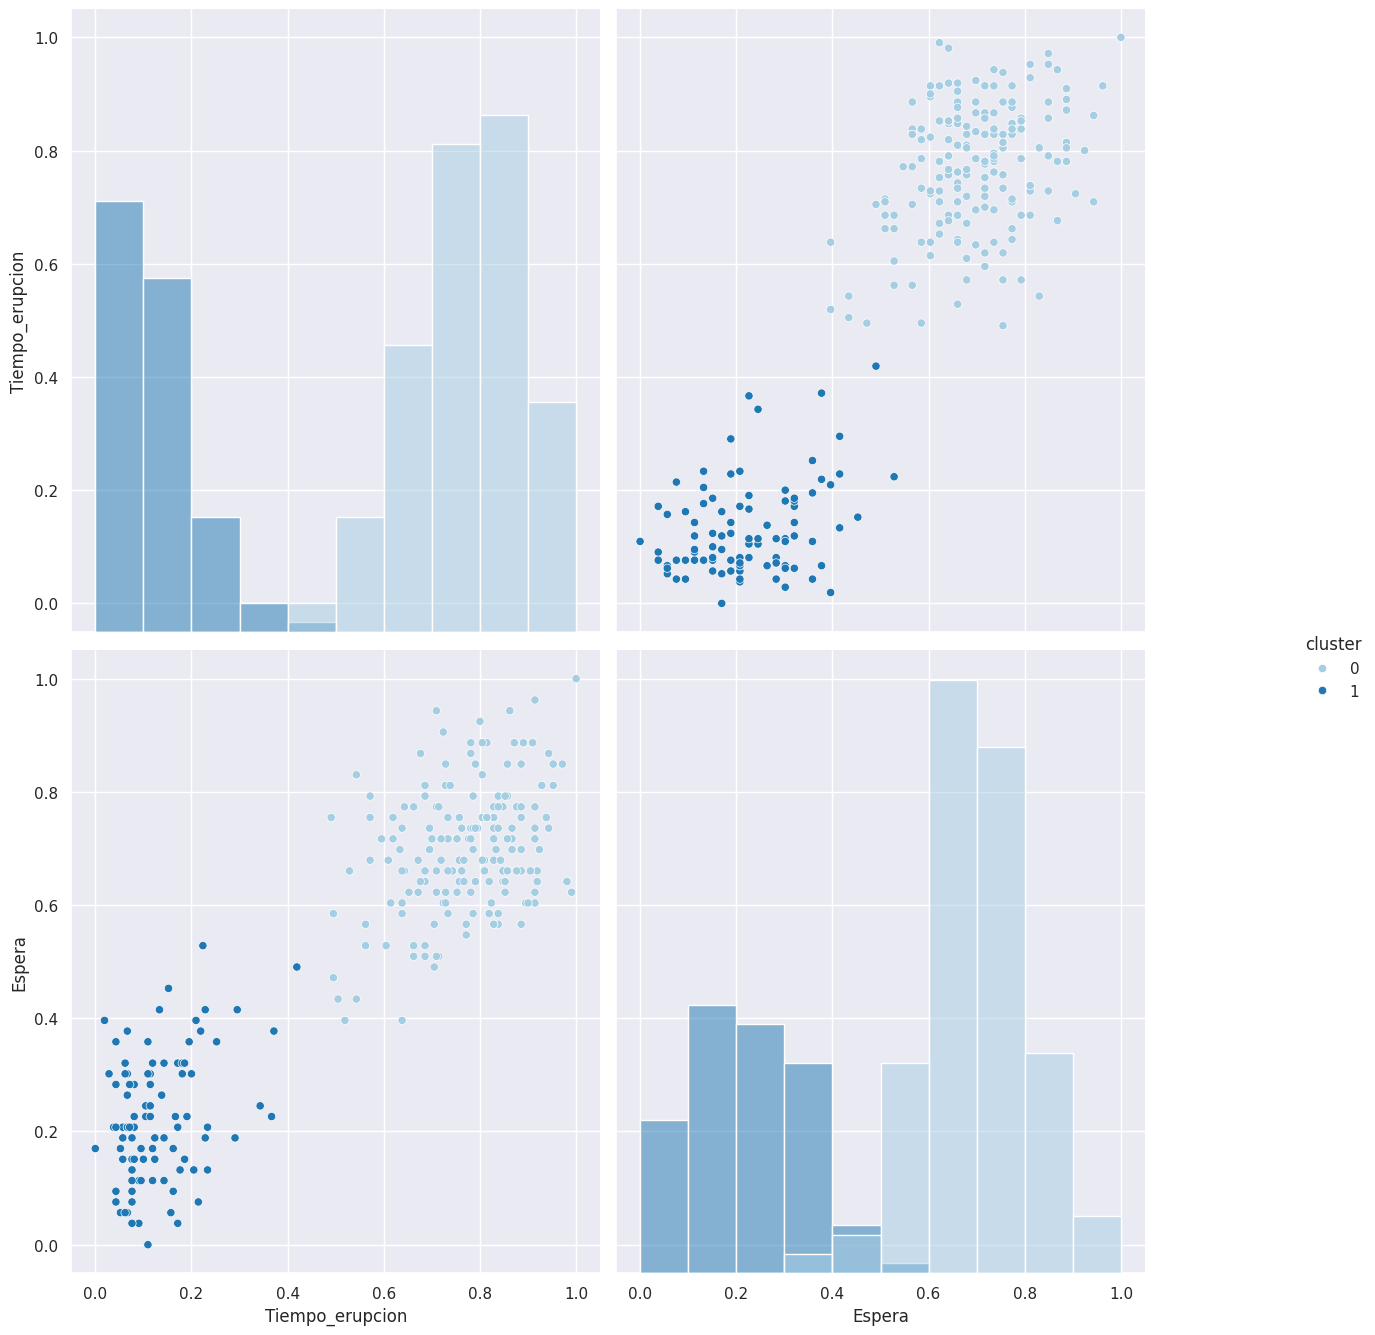

In [27]:
print("----- Clustering para Géiser (KMeans) -----") #titulo
contar_instancias_por_cluster(labels_kmeans)
visualizar_clusters(X_scaled_df, labels_kmeans, "K-Means")

Podemos ver como efectivamente se ha separado en dos clústers, uno azul oscuro y otro azul claro. En la diagonal podemos ver los histogramas individuales de cada variable separados por color de cada cluster. Vemos como prácticamente ha habido una separación completa entre erupciones cortas y frecuentes y erupciones largas y más espciadas en el tiempo. Confirmamos que es una buena separación entre clúster porque además, apenas se ve solapamiento.

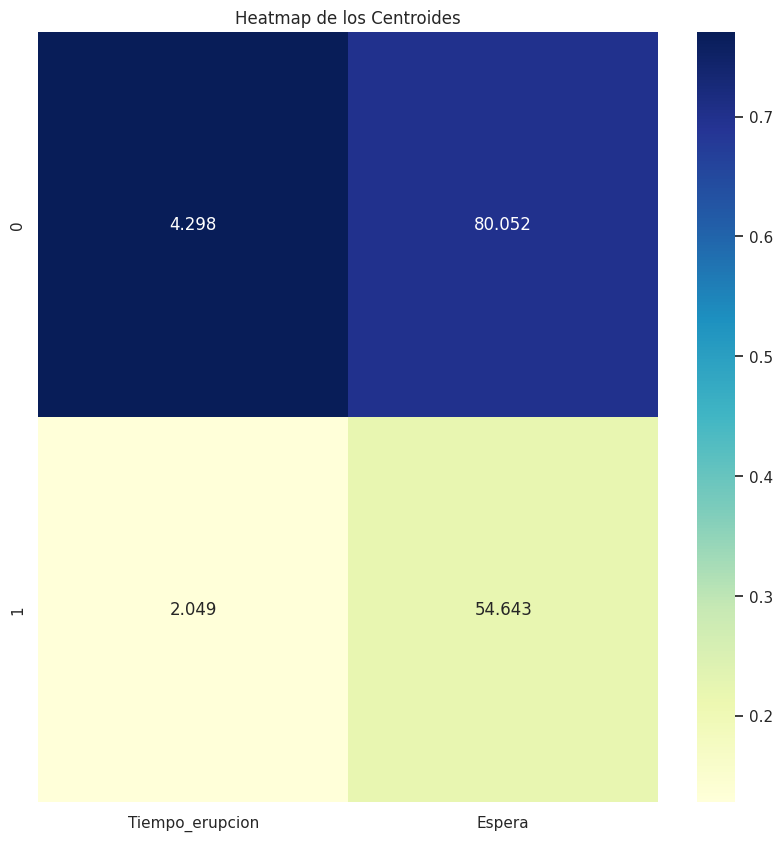

In [28]:
visualizar_centroides(data, usadas, kmeans)

Con este heatmap de centroides podemos ver los valores medios del centroide de cada clúster. Volvemos a ver una gran diferencia entre el clúster de erupciones largas con un mayor intervalo de espera y un grupo de erupciones más cortas con mayor frecuencia. Los centroides están bastante alejados por lo que están bien diferenciados los grupos.

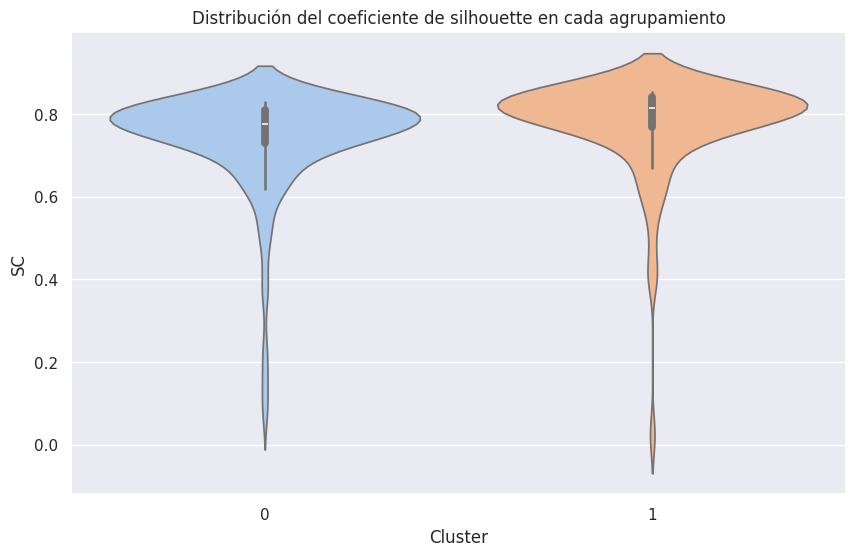

In [29]:
visualizar_silhouette_por_cluster(X_scaled_df, labels_kmeans)

Cada clúster está representado con un violin diferente y dentro tenemos un boxplot que nos indica la mediana y los cuartiles.

Vamos a analizarlo en detalle. Para el clúster 0 vemos como la mayoría de los valores de Silhouette están entre 0.75 y 0.85, con una mediana cerca de 0.80. Por lo que tenemos una distribución concentrada y simétrica, lo que indica buena cohesión interna. Además, hay muy pocos valores cercanos a 0 o negativos, por lo que casiningún punto está mal asignado.

Para el clúster 1 vemos como si baja un poco a los negativos pero sigue estando los valores se concentran entre 0.75 y 0.85, con una mediana incluso ligeramente superior a la del cluster 0. Por tanto, también muestra una alta cohesión y buena separación respecto al otro cluster.

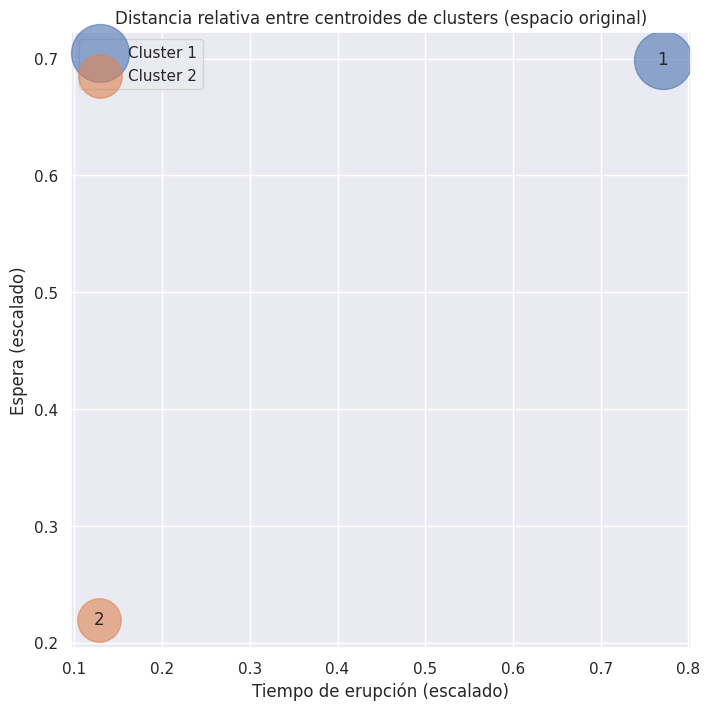

In [30]:
visualizar_distancias_centroides(kmeans, X_scaled_df)

Este gráfico muestra la posición relativa de los centroides de los clusters y nos es muy útil para ver la separación entre los clústers.

El cluster 1 (azul) está en la esquina superior derecha del gráfico, lo que indica valores altos en ambas variables, es decir, erupciones largas y espaciadas en el tiempo.

El cluster 2 (naranja) está en la esquina  inferior izquierda, con valores bajos en ambas variables, es decir, representa las erupciones cortas y frecuentes.

Vemos como no hay solapamiento entre los centroides, lo que sugiere una alta separación inter-cluster, corroborando las métricas vistas antes.

Un detalle que podemos observar en este gráfico es que el círculo azul es un poco más grande que el círculo naranja, por lo que en el clúster 1 hay más instancias. Es decir, que predominan las erupciones largas y espaciadas en el tiempo.

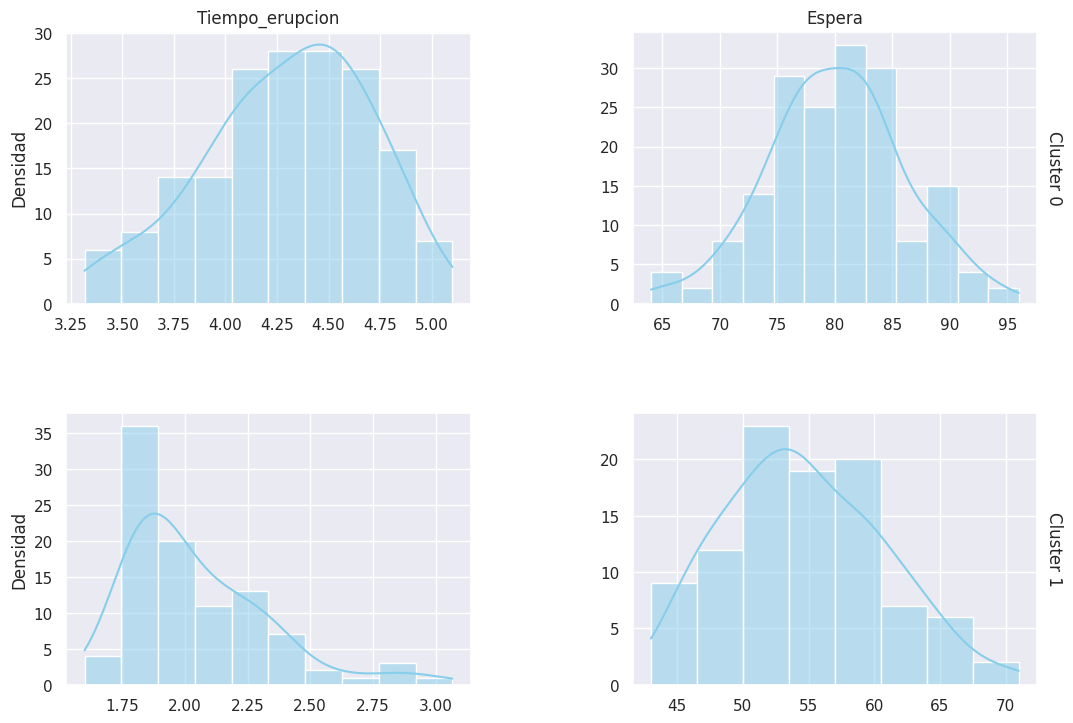

In [31]:
visualizar_distribuciones_por_cluster(data.copy(), labels_kmeans, usadas)

Aquí tenemos una visualización separada en clústers.

En el clúster 0 vemos como tenemos una distribución bastante simétrica en las dos variables.

En el clúster 1, vemos como la densidad está sesgada a la izquierda en erupciones cortas, pero en espera es algo más simétrica.

Todo concuerda con lo analizado anteriormente.

#### DBSCAN

Clusters encontrados (sin contar outliers): 2
Instancias por cluster:
  Cluster -1: 2 instancias
  Cluster 0: 174 instancias
  Cluster 1: 96 instancias
Calinski-Harabasz Index: 873.445, Silhouette Coefficient: 0.55661
Resultados para DBSCAN:


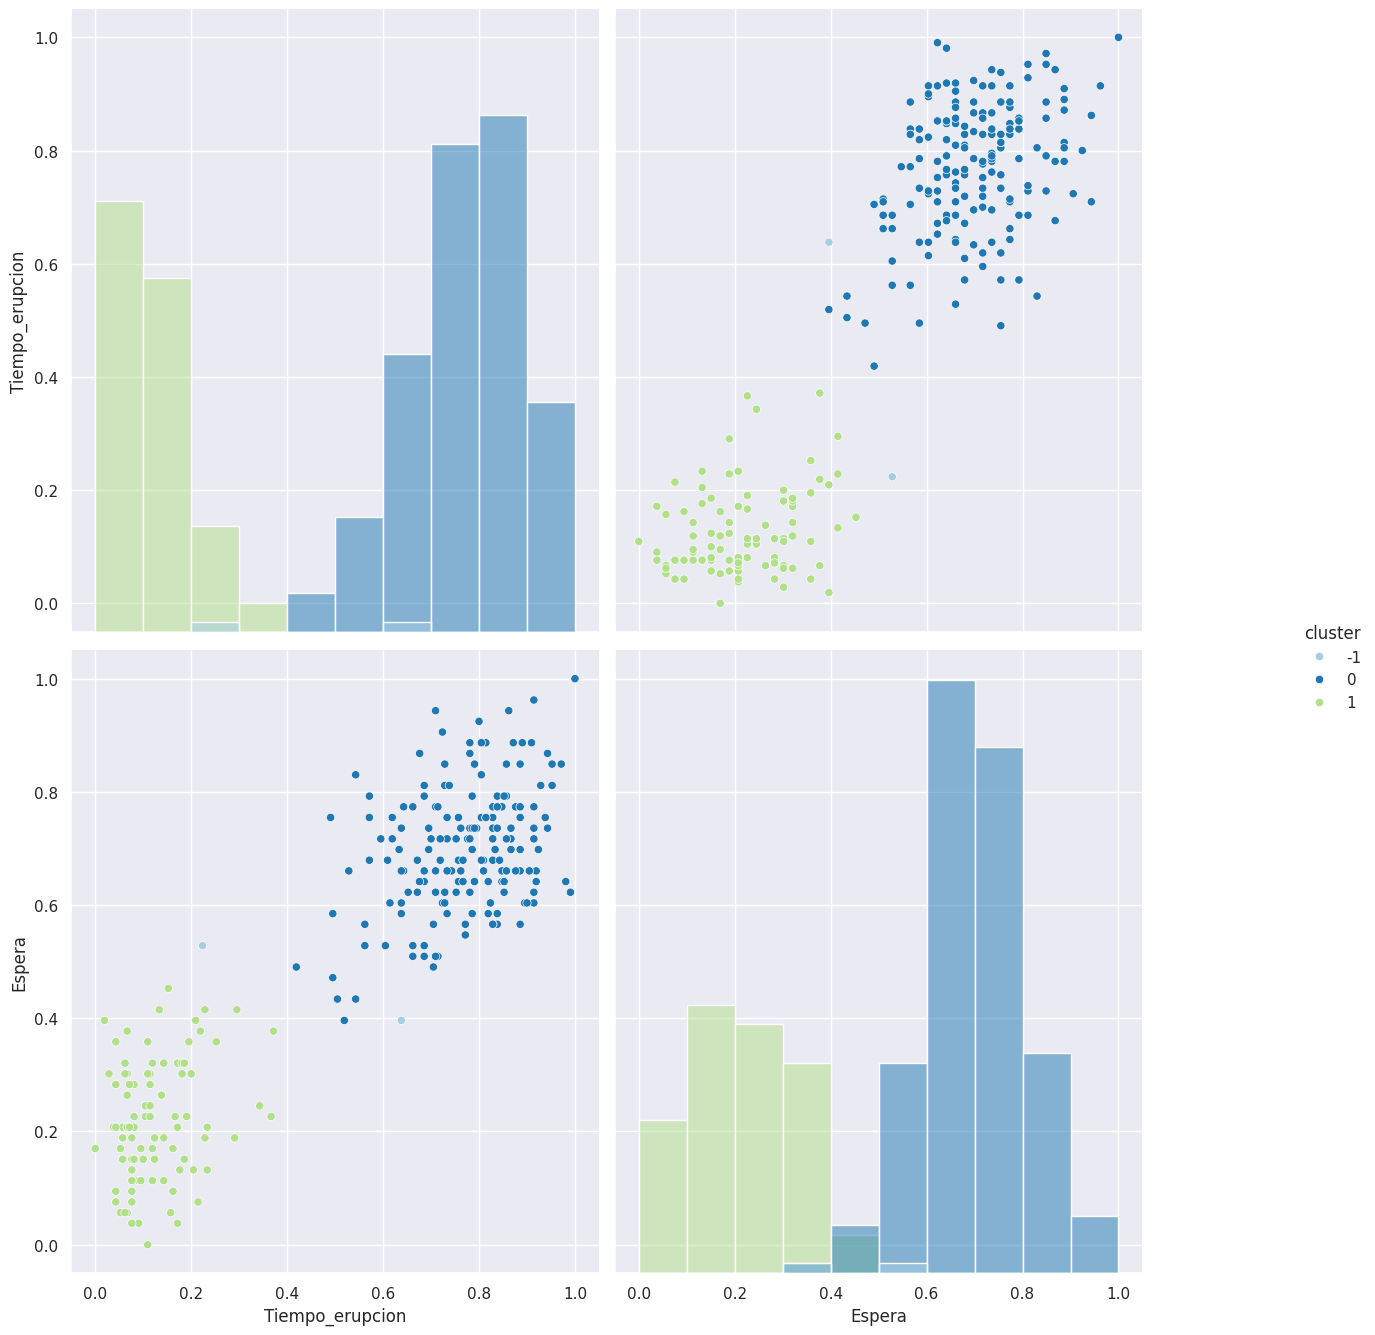

In [32]:
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0) #calculamos el numero de cluster sin tener en cuenta el cluster -1 que es el del ruido
print(f"Clusters encontrados (sin contar outliers): {n_clusters_dbscan}")
contar_instancias_por_cluster(labels_dbscan) #contamos cuantos puntos hay en cada grupo

if n_clusters_dbscan > 0: #si tiene sentido calcular las metricas
    evaluar_cluster(dbscan, X_scaled_df, labels_dbscan) #evaluamos el cluster

# vemos la distribucion
visualizar_clusters(X_scaled_df, labels_dbscan, "DBSCAN")

Podemos ver como otra vez se han vuelto a separar en dos clústers, uno azul oscuro y otro verde porque el azul claro es el cluster -1 que es el ruido y solo tiene 2 instancias. En la diagonal podemos ver los histogramas individuales de cada variable separados por color de cada cluster. Vemos como prácticamente ha habido una separación completa entre erupciones cortas y frecuentes y erupciones largas y más espciadas en el tiempo. A modo visual es una separación buena pero tiene peores resultados que con KMeans porque baja hasta un 0.55661 de coeficiente de Silhouette. Esto tiene que ver porque DBSCAN puede captar cluster más flexibles porque no tiene que ser esférico como el KMeans (al final usa la distancia) y eso hace que pierda compacidad.

Vemos como solo ha detectado dos outliers, por lo que no hay mucho ruido en nuestro dataset.

Este algoritmo no trabaja con centroides por lo que no es correcto ver el heatmap de centroides.

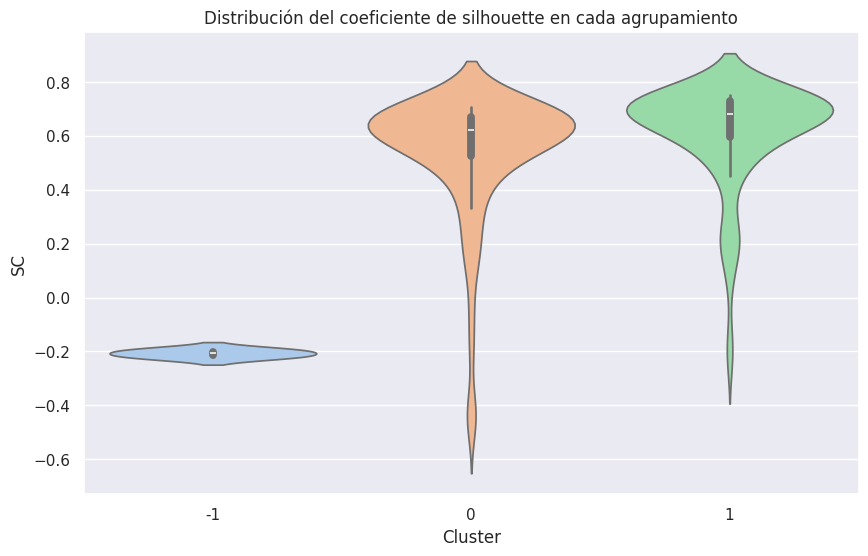

In [33]:
# Solo calculamos silhouette si hay al menos 2 clusters (sin contar el -1)
if n_clusters_dbscan > 1:
    visualizar_silhouette_por_cluster(X_scaled_df, labels_dbscan)
else:
    print("No se puede calcular Silhouette porque hay menos de 2 clusters")


Cada clúster está representado con un violin diferente y dentro tenemos un boxplot que nos indica la mediana y los cuartiles. Hemos incluido el cluster del ruido aunque solo tenga dos valores para hacernos a la idea.

Vamos a analizarlo en detalle. Para el clúster -1 vemos como tiene valores negativos lo que nos indica que no encajan en ningun clúster, de ahí viene que sea el ruido.

Para el clúster 0 vemos como la mayoría de los valores de Silhouette están entre 0.6 y aunque tiene valores más negativos, casi todos están en la parte positiva.

Para el clúster 1 vemos que es mejor que el clúster 0 porque no baja tanto en lo negativo y la gran mayoría está cercano a 0.7. Buen agrupamiento.

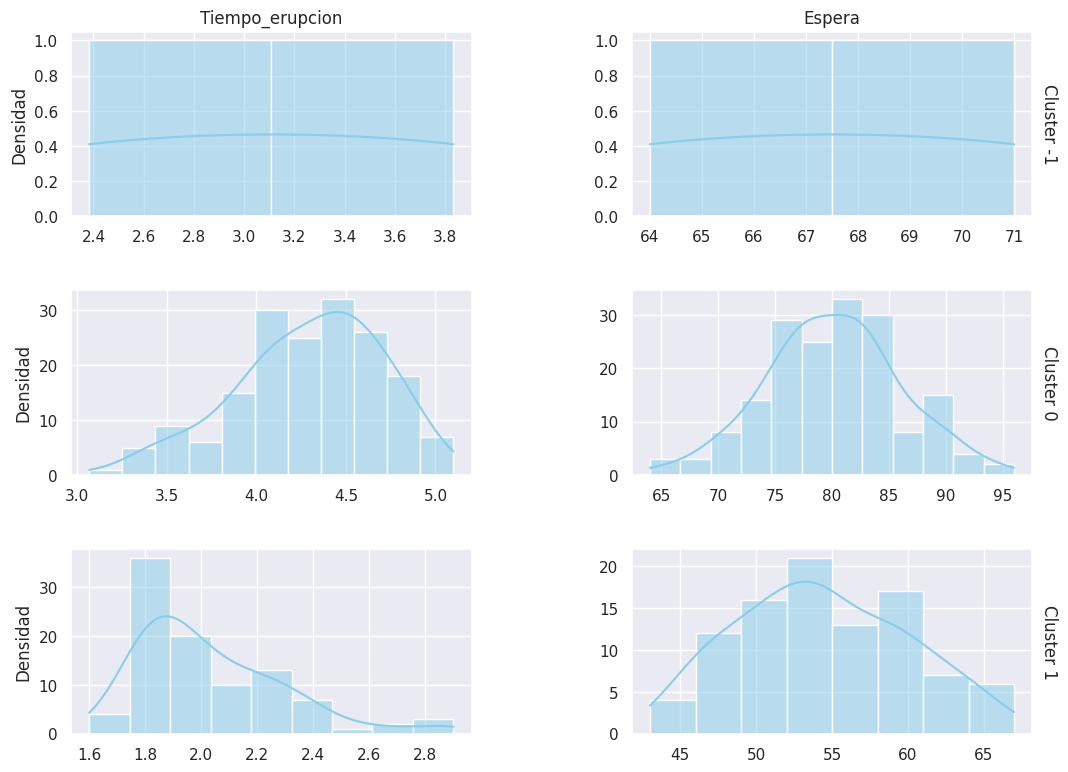

In [34]:
visualizar_distribuciones_por_cluster(data.copy(), labels_dbscan, usadas)

Aquí tenemos una visualización separada en clústers.

Como en el clúster -1 solo tenemos dos instancias sale así las barras. No hay una estructura clara y por tanto es normal que no pertenezcan a los otros clusters.

En el clúster 0 se centra en valores alto con ligera asimetría a la derecha. Se tratan de erupciones largas y con más tiempo de espera. Coincide con el comportamiento detectado por KMeans.

En el clúster 1, vemos valores más bajos y de timepo de erupcion sesgado a la izquierda por lo que vuelva a verse que son las erupciones cortas con esperas más reducidas.

Todo concuerda con lo analizado anteriormente.

### Cambio de hiperparámetros

Para el algoritmo KMeans quiero probar a aumentar el número clústers para ver si realmente dos clústers, que es la agrupación natural y que también ha dado DBSCAN es lo mejor. Probemos con 3 clústers:

In [35]:
#KMeans
start_kmeans = time.time() #empezamos a contar el tiempo

# Como hemos visto que puede estar dividido en dos cluster ponemos ese numero inicialmente
kmeans = KMeans(n_clusters=3, random_state=99) #modelo

#devuelvo las etiquetas predichas para cada instancia: fit()+predict()
labels_kmeans = kmeans.fit_predict(X_scaled) #con fit_predict combina fit(calcula los centroides y asgina cada punto al cluster mas cercano) y predict(asigna a cada instancia el cluster al que pertenece)

end_kmeans = time.time() #terminamos de contar el tiempo

# Imprimos resultados con nuestra funcion (calculamos las metricas)
print(f"Tiempo de ejecución: {end_kmeans - start_kmeans:.4f} segundos")
evaluar_cluster(kmeans, X_scaled, labels_kmeans)

Tiempo de ejecución: 0.0160 segundos
Calinski-Harabasz Index: 1300.755, Silhouette Coefficient: 0.50972


Como resultados para KMeans con 2 clusters eran los siguientes:

Tiempo de ejecución: 0.0529 segundos

Calinski-Harabasz Index: 1716.555, Silhouette Coefficient: 0.75522

Vemos como han bajado considerablemente las métricas, incluso peorando en el coeficiente de Silhoutte a DBSCAN que tenía: Calinski-Harabasz Index: 873.445, Silhouette Coefficient: 0.55661.

Veamos más en detalle como lo ha dividido.


KMeans con 3 clústers:
Instancias por cluster:
  Cluster 0: 114 instancias
  Cluster 1: 97 instancias
  Cluster 2: 61 instancias
Resultados para K-Means:


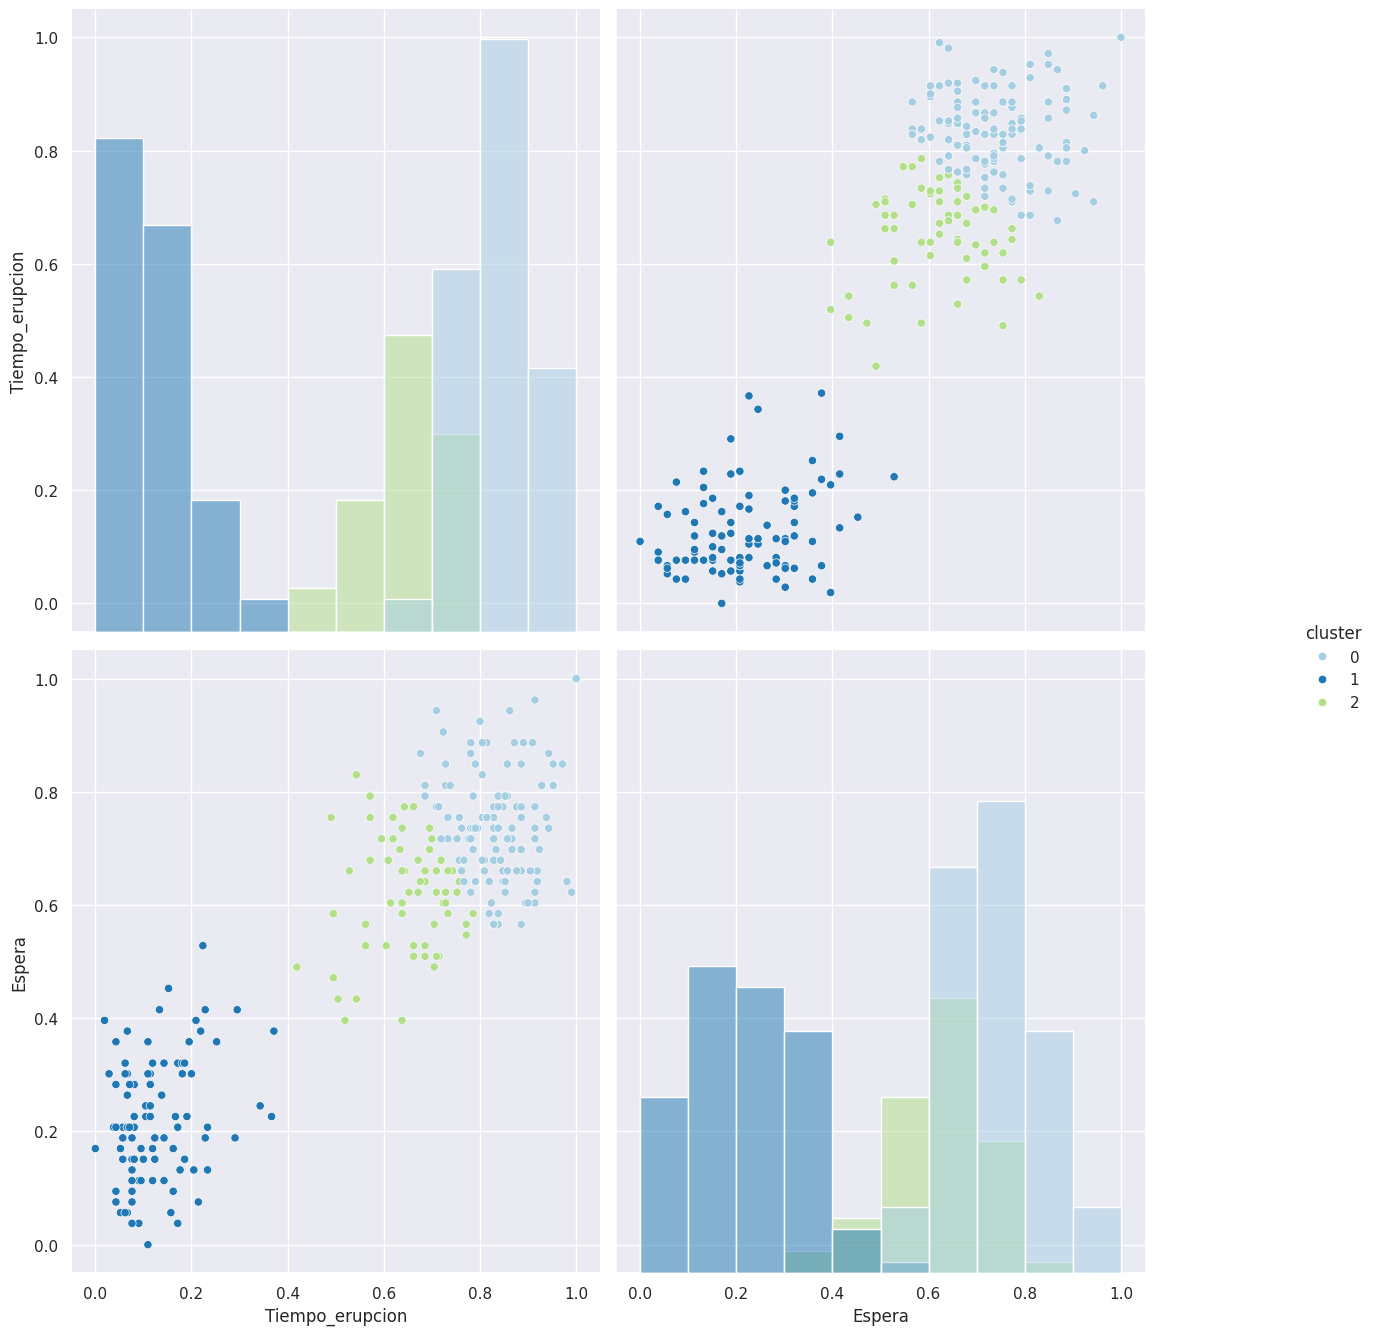

In [36]:
print("KMeans con 3 clústers:") #titulo
contar_instancias_por_cluster(labels_kmeans)
visualizar_clusters(X_scaled_df, labels_kmeans, "K-Means")

Vemos como lo único que ha hecho es de las erupciones más largas las ha dividido en dos grupos. Esto hace que haya más solapamiento y por tanto, de ahí sale que haya peores métricas.

Para confirmar que es mejor dividir en dos clústers, vamos a dividir en 4.

In [37]:
#KMeans
start_kmeans = time.time() #empezamos a contar el tiempo

# Como hemos visto que puede estar dividido en dos cluster ponemos ese numero inicialmente
kmeans = KMeans(n_clusters=4, random_state=99) #modelo

#devuelvo las etiquetas predichas para cada instancia: fit()+predict()
labels_kmeans = kmeans.fit_predict(X_scaled) #con fit_predict combina fit(calcula los centroides y asgina cada punto al cluster mas cercano) y predict(asigna a cada instancia el cluster al que pertenece)

end_kmeans = time.time() #terminamos de contar el tiempo

# Imprimos resultados con nuestra funcion (calculamos las metricas)
print(f"Tiempo de ejecución: {end_kmeans - start_kmeans:.4f} segundos")
evaluar_cluster(kmeans, X_scaled, labels_kmeans)

Tiempo de ejecución: 0.0226 segundos
Calinski-Harabasz Index: 1004.641, Silhouette Coefficient: 0.43739


Vemos como baja aún más por lo que lo mejor es 2 clústers.

KMeans con 4 clústers:
Instancias por cluster:
  Cluster 0: 89 instancias
  Cluster 1: 94 instancias
  Cluster 2: 14 instancias
  Cluster 3: 75 instancias
Resultados para K-Means:


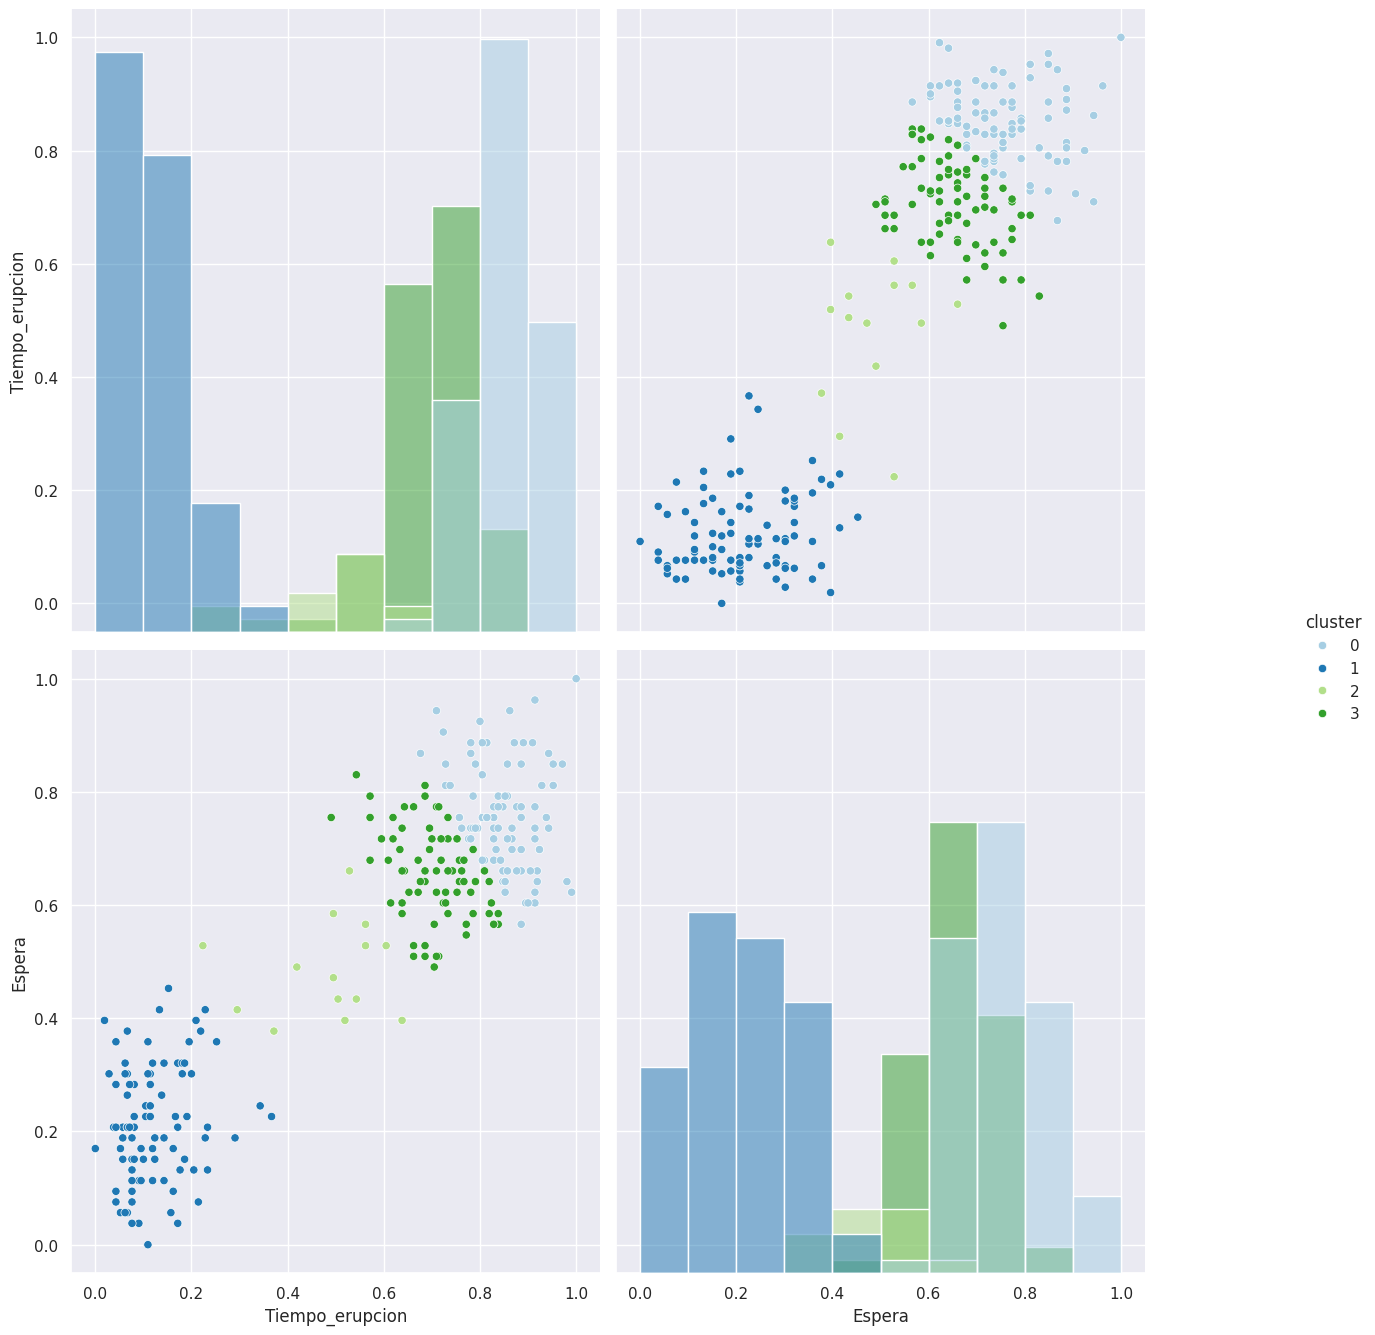

In [38]:
print("KMeans con 4 clústers:") #titulo
contar_instancias_por_cluster(labels_kmeans)
visualizar_clusters(X_scaled_df, labels_kmeans, "K-Means")

Vemos como se forma un clúster nuevo que es más central con valores ni muy altos ni muy bajos. Sin embargo, hay más solapamiento.

Como conlcusión sacamos que es correcto la intuición que teníamos en separar en dos clústers.

Vamos a cambiar ahora algún hiperparámetro del DBSCAN y ver que sucede. El más sensible es el eps porque controla el tamaño del vecindario. Vamos a subirlo y bajarlo para extraer conclusiones.

Vamos a probar a subirlo, entonces habrá más puntos que estarán dentro del radio de otros puntos. Por tanto, se formarán menos clústers pero más grandes y puede que el del -1 disminuya.

In [39]:
#DBSCAN
start_dbscan = time.time() #empezamos a contar el tiempo
dbscan = DBSCAN(eps=0.15, min_samples=5) #probamos con un valor de eps mas alto

labels_dbscan = dbscan.fit_predict(X_scaled)

end_dbscan = time.time() #terminamos de contar el tiempo

# Número de clusters sin contar los outliers, que tienen etiqueta -1
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Numero de clusters sin contar ruido (cluster -1): {n_clusters}")

# Imprimos resultados con nuestra funcion (calculamos las metricas)
print(f"Tiempo de ejecución: {end_dbscan - start_dbscan:.4f} segundos")

# Solo evaluamos si hay al menos 2 clusters distintos
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
if n_clusters > 1:
    evaluar_cluster(dbscan, X_scaled, labels_dbscan)
else:
    print("No se puede evaluar: hay solo 1 cluster (sin outliers).")


Numero de clusters sin contar ruido (cluster -1): 1
Tiempo de ejecución: 0.0211 segundos
No se puede evaluar: hay solo 1 cluster (sin outliers).


Ha ocurrido justo lo esperado, que al aumentar el eps se ha hecho un clúster muy grande. Esto no nos interesa. Vamos a bajarlo.

Al disminuir eps a 0.08 por ejemplo, menos puntos estarán cerca uno de otros, por tanto puede aparecer clústers más pequeños y que el clúster del ruido aumente.

In [40]:
#DBSCAN
start_dbscan = time.time() #empezamos a contar el tiempo
dbscan = DBSCAN(eps=0.08, min_samples=5) #probamos con un valor de eps mas alto

labels_dbscan = dbscan.fit_predict(X_scaled)

end_dbscan = time.time() #terminamos de contar el tiempo

# Número de clusters sin contar los outliers, que tienen etiqueta -1
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Numero de clusters sin contar ruido (cluster -1): {n_clusters}")

# Imprimos resultados con nuestra funcion (calculamos las metricas)
print(f"Tiempo de ejecución: {end_dbscan - start_dbscan:.4f} segundos")

# Solo evaluamos si hay al menos 2 clusters distintos
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
if n_clusters > 1:
    evaluar_cluster(dbscan, X_scaled, labels_dbscan)
else:
    print("No se puede evaluar: hay solo 1 cluster (sin outliers).")


Numero de clusters sin contar ruido (cluster -1): 3
Tiempo de ejecución: 0.0197 segundos
Calinski-Harabasz Index: 619.988, Silhouette Coefficient: 0.52134


Vemos como ha aumentado el número de clústers en uno, es decir, ya tenemos 3.

Clusters encontrados (sin contar outliers): 3
Instancias por cluster:
  Cluster -1: 7 instancias
  Cluster 0: 167 instancias
  Cluster 1: 93 instancias
  Cluster 2: 5 instancias
Calinski-Harabasz Index: 619.988, Silhouette Coefficient: 0.52134
Resultados para DBSCAN eps 0.08:


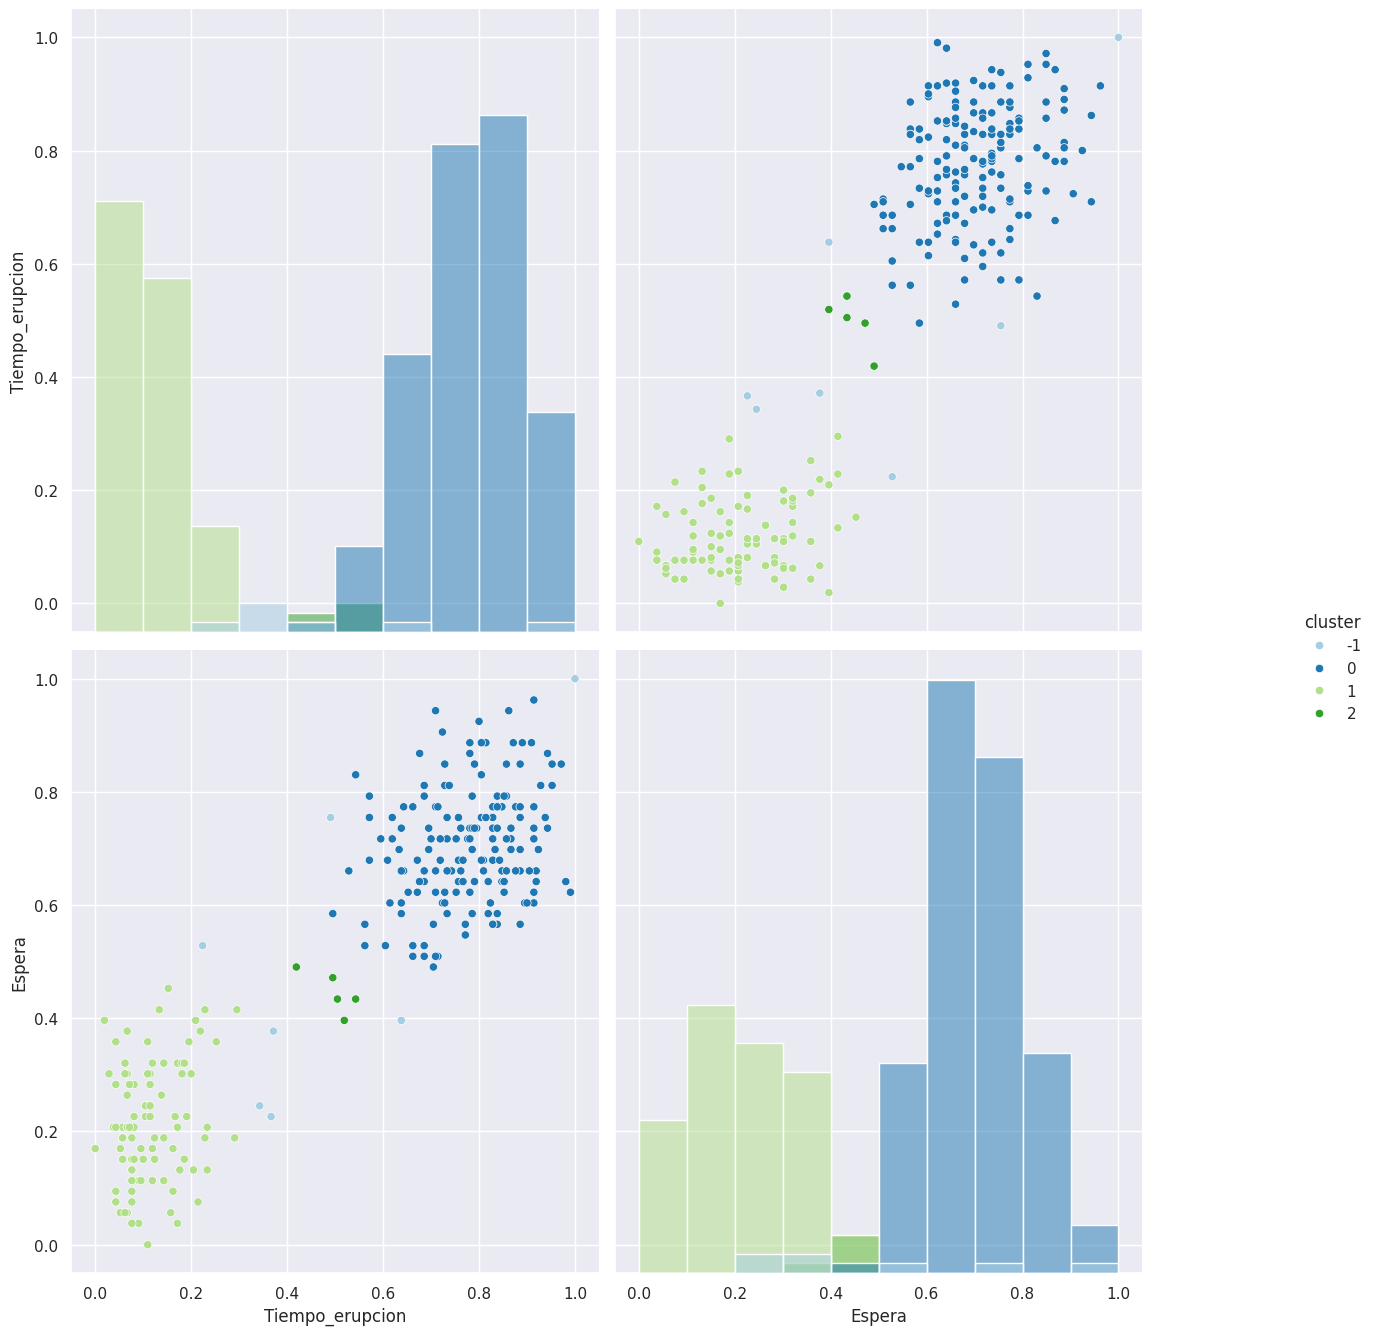

In [41]:
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0) #calculamos el numero de cluster sin tener en cuenta el cluster -1 que es el del ruido
print(f"Clusters encontrados (sin contar outliers): {n_clusters_dbscan}")
contar_instancias_por_cluster(labels_dbscan) #contamos cuantos puntos hay en cada grupo

if n_clusters_dbscan > 0: #si tiene sentido calcular las metricas
    evaluar_cluster(dbscan, X_scaled_df, labels_dbscan) #evaluamos el cluster

# vemos la distribucion
visualizar_clusters(X_scaled_df, labels_dbscan, "DBSCAN eps 0.08")

Con eps=0.1 teníamos los siguientes resultados:

Numero de clusters sin contar ruido (cluster -1): 2

Tiempo de ejecución: 0.0099 segundos

Calinski-Harabasz Index: 873.445, Silhouette Coefficient: 0.55661

Vemos como las métricas empeoran un poco y además el clúster de ruido tiene más instancias que no sabe en cual clasificar.

### Conclusiones

Al aplicar un algoritmo sencillo como el KMeans y obtener tan buenos resultados podemos diferenciar claramente dos tipos de erupciones: las cortas y frecuentes y las largas y más espaciadas en el tiempo. Hemos obtenido con una separación inicial de dos clúster muy buenas métricas y lo hemos corroborado visualmente con varios gráficos. Destaco la importancia del análisis exploratorio de datos previo al modelo porque es ahí cuando hemos podido sospechar que había una clara separación en dos clústers. Si no lo hubiésemos estudiado eso antes podríamos habernos equivocado en el número inicial de clúster y nos hubiesen dado peores resultados.

Cambiando los hiperparámetros de ambos modelos, hemos verificado que la mejor segmentación es en dos clústers que coincide con la naturaleza de los datos que vimos en el análisis inicial.

En cuanto al método DBSCAN, hemos obtenido resultados bastante parecidos. A diferencia de KMeans, no requiere especificar el número de clústers, lo que nos permite detectar agrupaciones de densidad similar e identificar posibles puntos con ruido con el clúster -1. Hemos podido llegar a valores adecuados de eps y min_samples. Hmos observado que es muy sensible al cambio de los hiperparámetros, sobre todo con eps porque un valor demasiado alto de éste puede agrupar todos los datos en un único clúster, mientras que un valor demasiado bajo puede generar sobresegmentación o exceso de ruido.

En general, los dos modelos dan resultados parecidos con los que podemos sacar una conclusión clara: hay dos tipos de erupciones, las largas con tiempos de espera más largos y las cortas con tiempos menores de espera. En nuestro problema nos ha dado mejor resultado el KMeans porque es un problema fácil de segmentar en dos clústers. En cuanto al tiempo de ejecucción, el Kmeans ha sido más lento, lo cual es raro porque debería de ser al revés teóricamente. Puede ser por el hecho que mi dataset es bastante pequeño y está bien segmentado, es decir, no es muy complejo.



# **Ejercicio 2: Minería de reglas de asociación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de extracción de reglas de asociación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo $X\rightarrow Y$ desde itemsets frecuentes.


## El conjunto de datos


El conjunto de datos contiene un subconjunto de ventas efectuadas en una panadería. Se organiza en 4 columnas:

- **Fecha** en la que se realizó la venta.
- **Hora** a la que se realizó la venta.
- **ID** de la transacción (ticket), anonimizado.
- **Producto** involucrado en la venta.

Los datos se corresponden con un subconjunto de los tickets generados por la panadería desde el 30 de Octubre de 2016 hasta el 9 de Mayo de 2017, incluyendo la venta de 21293 productos en un total de 9531 transacciones.

Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, ```'Adjustement'``` puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), ```'NONE'``` se utiliza para nombrar valores perdidos, y ```'Afternoon with the baker'``` podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

La siguiente celda de código muestra cómo leer el conjunto de datos en el cuaderno:

## Tarea


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de extracción de itemsets frecuentes.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones. **Se deberá incluir un estudio del tiempo de ejecución de los algoritmos seleccionados para extracción de itemsets frecuentes**. Se puede utilizar el comando reservado ```%timeit instrucción** para hacer un estudio del tiempo que tarda la instrucción en ejecutarse. **CUIDADO: Si la instrucción muestra algo por consola, la ejecución de múltiples instancias de la ejecución de la función puede colapsar la celda de resultado.**

Un ejemplo de uso de ```%timeit``` se encuentra en la siguiente celda de código:



In [42]:
import numpy as np

%timeit np.zeros(1000)

541 ns ± 8.39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Solución




In [43]:
# Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import networkx as nx

In [44]:
# De donde vamos a descargar el dataset
URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
data= pd.read_csv(URL) # leemos el archivo csv
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## Análisis descriptivo del problema y análisis expoloratiorio de los datos

Antes de empezar  a extraer reglas, vamos a estudiar un poco los datos iniciales de la panadería sin realizar ningún cambio.

In [45]:
# Vemos los 10 primeros de nuestro dataset
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


Vemos que tenemos en total 4 columnas. Podemos observar que el número de transacciones se repite porque un cliente puede comprar varios productos en una misma compra. Por tanto, todos los productos comprados por un mismo cliente tendrán el mismo número de transacción. Ejemplo: el ticket 3 compró chocolate caliente, jamón y galletas. Vamos a intentar sacar conclusiones con estos datos.

In [46]:
#Columnas del dataset
data.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

In [47]:
#Funcion que nos da información sobre el dataset data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


Podemos observar como tenemos 21293 registros. De primeras pone que no hay valores nulos, pero el enunciado nos dice que puede haber casillas con NONE y esas las tenemos que estudiar como valores nulos, lo haremos en el apartado de preprocesamiento de datos.

Tenemos 4 columnas:
* Date: fecha de la venta en formato string
* Time: hora de la venta en formato string
* Transaction: Id de cada cliente (puede repetirse si un cliente compra varios productos)
* Item: producto vendido. Puede haber otros valores que no son en sí un producto vendido: Adjustement' puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), 'NONE' se utiliza para nombrar valores perdidos, y 'Afternoon with the baker' podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

In [48]:
# Vemos el dataset entero
data

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


Vamos a ver los 15 productos que son más vendidos:

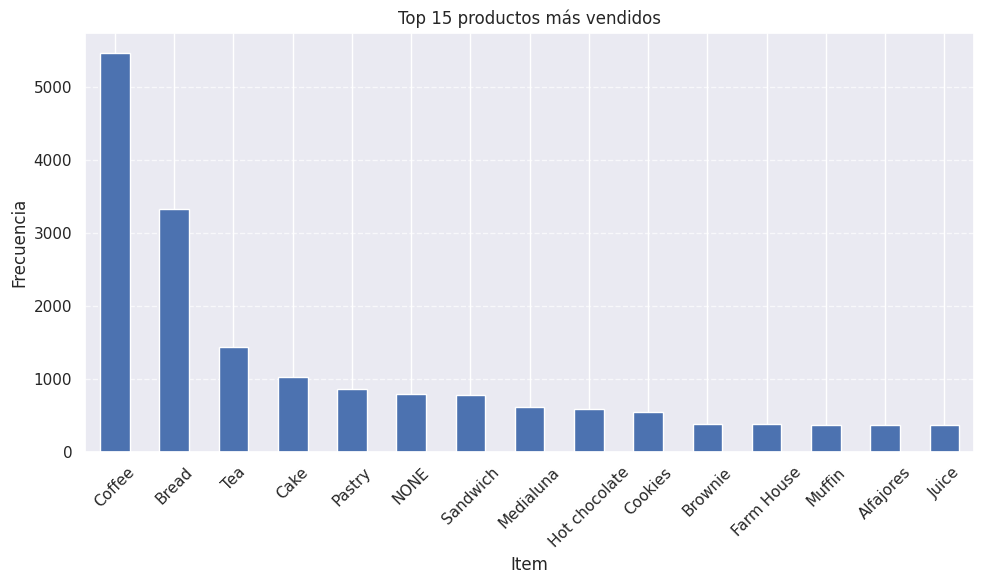

In [49]:
# Contamos cuantas veces aparece cada producto en la columna item y cogemos los 15 mas vendidos
top_products = data['Item'].value_counts().head(15)

plt.figure(figsize=(10,6)) #creamos una figura
top_products.plot(kind='bar') #grafico de barras
plt.title('Top 15 productos más vendidos') #ponemos titulo
plt.ylabel('Frecuencia') #etiqueta al eje y
plt.xticks(rotation=45) # rotamos el eje x (los nombres)
plt.grid(True, axis='y', linestyle='--', alpha=0.7) #cuadricula
plt.tight_layout() #ajustamos margenes
plt.show()#mostramos grafico

Podemos observar como el producto más vendido es cafe con más de 5000 compras y le sigue el pan con más de 3000 compras.

Nos fijamos como está en este top 'NONE', lo que indica que hay bastantes productos que no sabemos el nombre. Después estudiaremos que hacer con ellos.

Ahora vamos a ver la distribución por fechas:

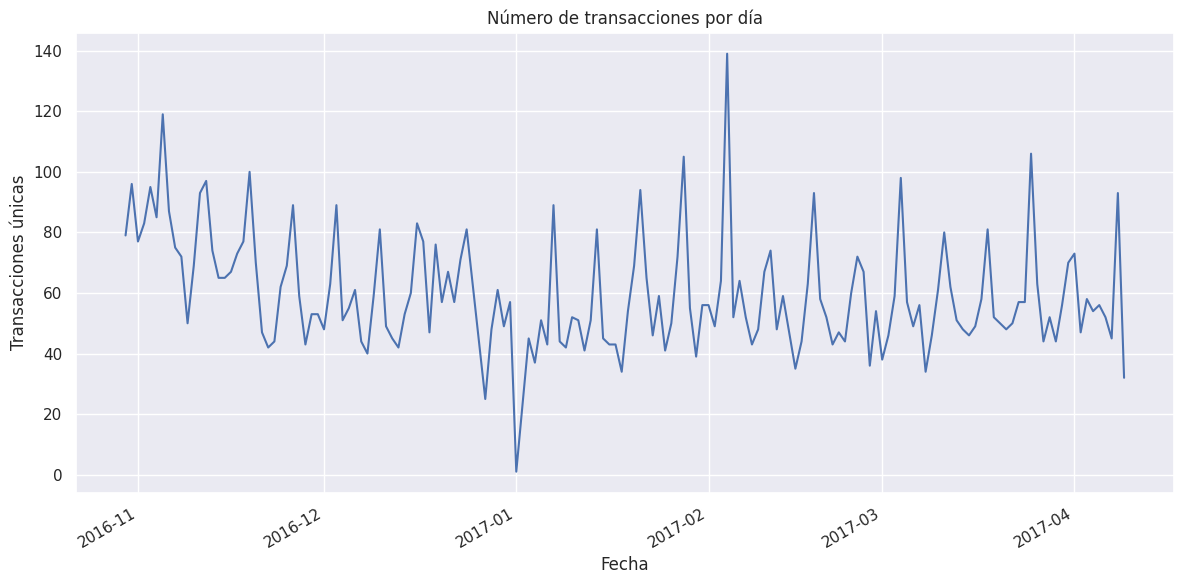

In [50]:
# Convertimos la columna Date al tipo datetime para poder agrupar por fecha
data['Date'] = pd.to_datetime(data['Date'])

# Agrupamos los datos por fecha y contamos cuántas transacciones únicas hubo cada día
ventas_por_dia = data.groupby('Date')['Transaction'].nunique()

plt.figure(figsize=(12,6)) # creamos figura
ventas_por_dia.plot() #evolucion del numero de transacciones diarias
plt.title('Número de transacciones por día')
plt.xlabel('Fecha')
plt.ylabel('Transacciones únicas')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar que las compran han sido efectadas desde más o menos noviembre del 2016 hasta mitad de abril del 2017. Hay meses que se vende más como en febrero donde hay un gran pico y o otros meses que menos como enero del 2017, donde hay un pico negativo que puede ser debido al cierre del local o porque simplemente no se recogieron datos en esa fecha.

No hay una tendencia general, es decir, no vemos como siempre crece o siempre decrece a largo plazo. Además, se puede apreciar un patrón cíclio, lo que puede deberse a que ciertos días de la semana, como por ejemplo el fin de semana, se compre más.

Vamos a comprobarlo viendo las transacciones por día de la semana:

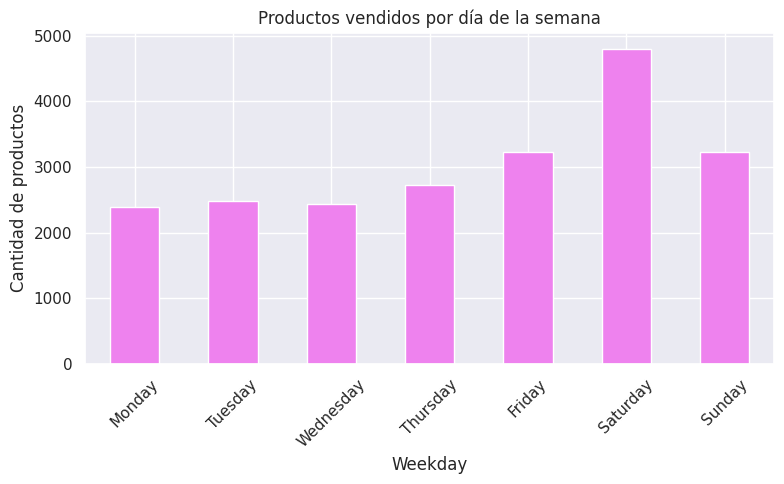

In [51]:
# Sacamso el nombre de cada deia de la semana con la columna Date
data['Weekday'] = data['Date'].dt.day_name()

# Contamos cuantos productos se vendieron en cada dia y los reordenamos
data['Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', figsize=(8,5), color='violet')

plt.title('Productos vendidos por día de la semana')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Con este gráfico podemos corroborar la observación que ciertos días de la semana se venda más. El viernes y fin de semana es cuando la gente compra más en la panadería. Los primeros días de la semana no venden tanto, pero después el sábado venden bastante, casi 5000 productos en un día.

Distribución horaria:

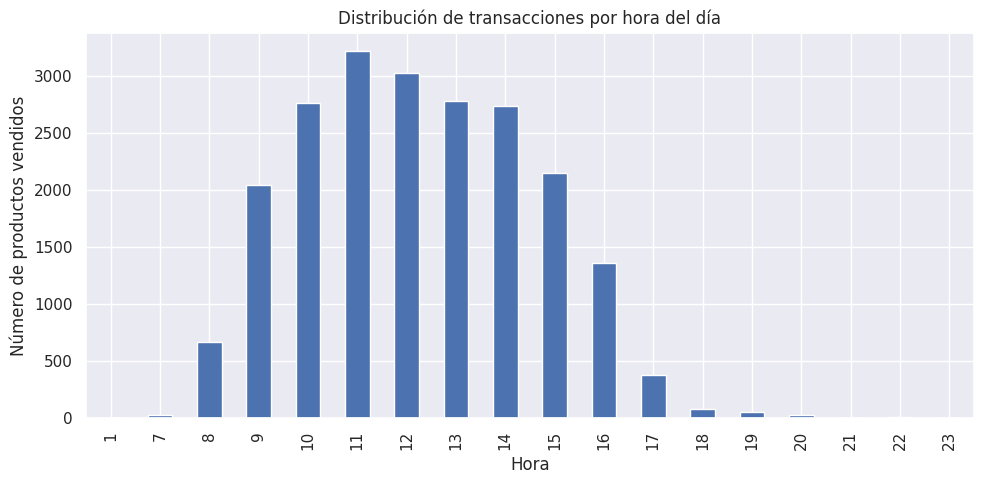

In [52]:
# Convertimos la hora a formato datetime porque time de por si es un string
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

# Contamos cuentas transacciones se realizaron por cada hora del día y las ordenamos por hora
data['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Distribución de transacciones por hora del día')
plt.xlabel('Hora')
plt.ylabel('Número de productos vendidos')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar las horas frecuentes de comprar. Vemos como a las 7 de la mañana y a partir de las 17h es bastante baja la compra en la panadería. Entre las 9 am y las 3 pm es cuando más habitual es comprar.

Hemos visto que el número de transacciones se repite porque más bien es el número del ticket. Entonces vamos a ver cuantos tickets realmente se han efectuado en la panadería:

In [53]:
# Numero de transacciones unicas que hay
data['Transaction'].nunique()

9531

Pues tenemos un total de 9531 tickets, donde entre todos ellos se han comprado un total de 21293 productos.

Número de productos por transacción:

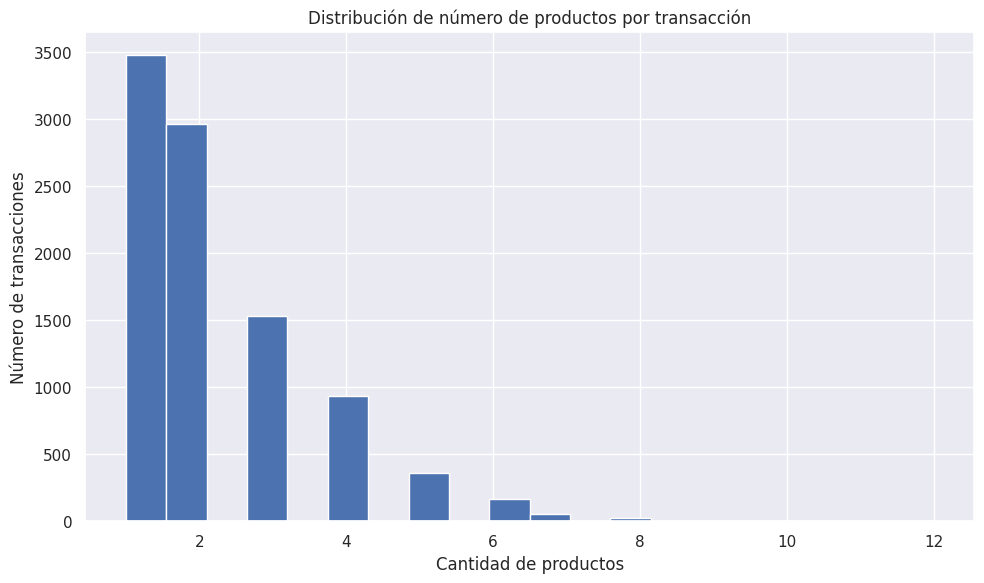

In [54]:
# Agrupamos por numero de transaccion y contamos cuántos productos se compraron en cada una
productos_por_transaccion = data.groupby('Transaction')['Item'].count()

plt.figure(figsize=(10,6))
productos_por_transaccion.hist(bins=20)
plt.title('Distribución de número de productos por transacción')
plt.xlabel('Cantidad de productos')
plt.ylabel('Número de transacciones')
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoría de las transacciones tienen pocos productos, es decir, casi 3400 tickets solo han comprado una cosa y casi 3000 solo dos cosas. Esto es lo más normal en una panadería porque la gente se suele pedir pocas cosas, por ejemplo un café y algo para comer.

## Preprocesado de datos
Vamos a preparar un poco los datos antes de entrenar ya que suele ser mejor tener buenos datos para que den buenos resultados. Vamos a plantear los siguientes apartados:

*   Selección y extracción de características
*   Reducción de dimensionalidad
*   Outliers
*   Missing values
*   Escalado de variables
*   Codificación y transformación de datos
*   Desbalanceo de datos




### Selección, extracción de características y reducción de dimensionalidad

En el dataset original tenemos de variables: hora, tiempo, transacción e item. Sin embargo, como nosotros queremos estudiar la relación de productos comprados, realmente no nos importa el tiempo ni la hora. Por tanto, nos vamos a quedar solo con 'Transaction' e 'Item' para la parte de reglas de asociación.

In [55]:
# Copiamos solo las columnas relevantes
data = data[['Transaction', 'Item']]

In [56]:
# Vemos los primeros
data.head(8)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee


### Outliers
Un valor atípico (outlier) son datos que se desvían significativamente del resto de los datos.

En el contexto que estamos trabajando de reglas de asociación, los outliers pueden ser transacciones con una cantidad exagerada de productos o bien productos muy raros, es decir, que solo aparezcan una vez. Vamos a revisar cuantos productos por transacción hay:

In [57]:
# Agrupamos los datos por transacción y contamos cuántos productos hay en cada una
tamanio_cesta = data.groupby('Transaction')['Item'].count()
tamanio_cesta.describe() #estadisticas descriptivas

,Item
count,9531.000000
mean,2.234078
std,1.350946
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,12.000000


El máximo de productos en un ticket es de 12, lo cual no es tan descabellado. Veamos más en detalle cuantos tickets hay con más de 8 productos:

In [58]:
# Calculamos el tamaño de cada transacción, es decir, cuántos productos tiene
tam_cesta = data.groupby('Transaction')['Item'].count()

# Filtramos las transacciones con más de 8 productos
transacciones_mas_8 = tam_cesta[tam_cesta > 8]

# Las mostramos
print(f"Número de transacciones con más de 8 productos: {len(transacciones_mas_8)}")
print(transacciones_mas_8.sort_values(ascending=False))


Número de transacciones con más de 8 productos: 14
Transaction
6474    12
6279    11
6412    11
6716    11
6045    10
3673    10
9447    10
8835    10
7245    10
3799     9
6290     9
6038     9
6519     9
9534     9
Name: Item, dtype: int64


Solo hay 14 tickets con más de 8 productos. Por tanto, creo que no es muy recomendable eliminar nada porque quiero tener cuanta más información mejor. Así podré consolidar algunas reglas que se utilicen.

### Missing values


Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, 'Adjustement' puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), 'NONE' se utiliza para nombrar valores perdidos, y 'Afternoon with the baker' podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

Estos valores son no representativos y solo mete ruido porque no queremos hacer ninguna regla de asociación que sea del tipo None -> pan. No tendría sentido, al igual que 'Afternoon with the baker' o 'Adjustement'. Por tanto, vamos a eliminar las instancias que tenga algun tipo de esos.

In [59]:
# Definimos la lista de valores que queremos eliminar porque no son productos reales vendidos
items_invalidos = ['NONE', 'Adjustment', 'Afternoon with the baker']

# Filtramos las filas que tengan alguno de esos valores
data= data[~data['Item'].isin(items_invalidos)]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20462 entries, 0 to 21292
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  20462 non-null  int64 
 1   Item         20462 non-null  object
dtypes: int64(1), object(1)
memory usage: 479.6+ KB


In [61]:
# Tickets restantes
data['Transaction'].nunique()

9433

Como hemos visto antes, tenemos muchos tickets donde solo hay un producto, es decir, que solo han comprado una cosa. Esto no nos aporta nada de información porque para hacer una regla mínimo tiene que tener antecedente y consecuente, por lo que mínimo necesitamos dos productos. Por tanto, lo más recomendable es eliminar este tipo de casos. Son muchos por lo que hemos visto antes.

In [62]:
# Eliminamos transacciones con menos de 1 producto (no podemos hacer reglas de asociación con solo un elemento)
tamanio_cesta = data.groupby('Transaction')['Item'].count() # agrupamos por transaccinoes, contamos cuantos productos tiene
transacciones_utiles = tamanio_cesta[tamanio_cesta > 1].index #nos quedamos solo con las que tengan mas de un producto

data = data[data['Transaction'].isin(transacciones_utiles)] #nos quedamos solo con las transacciones utiles

In [63]:
# Vemos como se han quedado los datos despues del filtrado
data

,Transaction,Item
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
...,...,...
21287,9682,Tacos/Fajita
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 1 to 21291
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  16860 non-null  int64 
 1   Item         16860 non-null  object
dtypes: int64(1), object(1)
memory usage: 395.2+ KB


In [65]:
# Tickets restantes
data['Transaction'].nunique()

5831

Después de quitar los valores perdidos y las transacciones que solo tienen un producto nos quedamos con 16860 productos vendidos y 5831 tickets. Hemos reducido mucho la dimensionalidad, pero todo lo que hemos quitado es ruido.

### Escalado de variables

No es neceario en reglas de asociación de este tipo porque no hay variables numéricas continuas. Todos los atributos son productos, es decir, categóricos.

### Codificación y transformación de datos

Vamos a revisar los items para ver si hay dos cosas parecidas que sean lo mismo o que se hayan escrito mal o algo. Un ejemplo: Bread=bread. Así también podemos ver el número de productos que venden en la panadería.

In [66]:
# Vemos los valores únicos ordenados alfabéticamente
items_unicos = sorted(data['Item'].unique())
print(f"Número de valores únicos en 'Item': {len(items_unicos)}")
for item in items_unicos:
    print(f"{item}")


Número de valores únicos en 'Item': 91
Alfajores
Argentina Night
Art Tray
Bacon
Baguette
Bakewell
Bare Popcorn
Basket
Bowl Nic Pitt
Bread
Bread Pudding
Brioche and salami
Brownie
Cake
Caramel bites
Cherry me Dried fruit
Chicken Stew
Chicken sand
Chimichurri Oil
Chocolates
Christmas common
Coffee
Coffee granules 
Coke
Cookies
Crepes
Crisps
Drinking chocolate spoons 
Duck egg
Dulce de Leche
Eggs
Ella's Kitchen Pouches
Empanadas
Extra Salami or Feta
Fairy Doors
Farm House
Focaccia
Frittata
Fudge
Gift voucher
Gingerbread syrup
Granola
Hack the stack
Half slice Monster 
Hearty & Seasonal
Honey
Hot chocolate
Jam
Jammie Dodgers
Juice
Keeping It Local
Kids biscuit
Lemon and coconut
Medialuna
Mighty Protein
Mineral water
Mortimer
Muesli
Muffin
My-5 Fruit Shoot
Nomad bag
Olum & polenta
Panatone
Pastry
Pick and Mix Bowls
Pintxos
Polenta
Postcard
Raspberry shortbread sandwich
Raw bars
Salad
Sandwich
Scandinavian
Scone
Smoothies
Soup
Spanish Brunch
Spread
Tacos/Fajita
Tartine
Tea
The BART
The Nomad

Para poder aplicar los algoritmos de Apriori o FP-Growth, necesitamos convertir las transacciones en lista de items por transacción.

In [67]:
# Agrupamos los productos por transacción
transactions = data.groupby('Transaction')['Item'].apply(list)
transactions = transactions.tolist()

In [68]:
# Vemos las primeras por ver como se han quedado
transactions[0:5]

[['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea']]

In [69]:
# Codificamos las transacciones en formato one-hot (booleano)
te = TransactionEncoder() # para convertir listas de productos en formato one-hot
te_ary = te.fit(transactions).transform(transactions) #cada fila es una transacción y cada columna un producto
df_encoded = pd.DataFrame(te_ary, columns=te.columns_) #como hemos convertido antes en la matriz boolana, ahora la convertimos en un dataframe de pandas

### Desbalanceo de datos
En este caso sería si un producto aparece mucho más que otro, pero eso es información interesante a tener en cuenta. Por tanto, no corregimos nada.

## Selección de dos algoritmos de extracción de itemsets frecuentes.

He decidido utilizar los dos algoritmos más clásicos de reglas de asociación: Apriori y FP-Growth (Frequent Pattern Growth). Queremos generar reglas que sean del tipo ${X} → {Y}$ que siginifica que si se compra $X$, entonces es probable que se compre también $Y$.

Vamos a explicar como funciona cada algoritmo:
* Apriori: es un método clásico de extracción de itemsets frecuentes.
Se basa en el uso de la métrica de soporte para construir iterativamente itemsets más complejos partiendo de itemsets más simples. Necesita un hiperparámetro min_support que indique el mínimo soporte de un itemset que estamos dispuestos a aceptar.
El algoritmo se basa en un principio: *propiedad apriori*, el cual indica que si un conjunto de ítems es frecuente, entonces todos sus subconjuntos también lo son. Los pasos a que realiza el algoritmo es el siguiente:


1.   Itemsets de tamaño 1: se calcula el soporte de cada ítem individual y se eliminan los que no cumplen el soporte mínimo.
2.   Itemsets de tamaño 2 hasta k-1: se generan combinaciones de tamaño k.
3. Se eliminan los candidatos que tienen algún subconjunto no frecuente.
4. Se calcula el soporte del cadidato.
5. Se vuelve a repetir hasta que no se puedan generar más itemsets frecuentes.
6. Se generan las reglas que cumplan el mínimo de confianza y lift.

Las ventajas son que es bastante sencillo de implementar y que genera reglas válidas. Sin embargo, es bastante costoso computacionalmente con grande cantidad de datos, genera muchos candidatos innecsarios y recorre muchas veces el dataset.



* FP-Growth: es un algoritmo eficiente para la extracción de itemsets frecuentes. Mejora la eficiencia del Apriori porque evita la generación explícita de candidatos y reduce el número de veces que recorre el dataset. Esto lo soluciona porque utiliza una estructura de datos más eficientes llamada FP-Tree. Es compacta y organiza la información de forma jerárquica. Además, agrupa las transacciones que comparte prefijos comunes y permite explorar los ítems frecuentes sin necesidad de generar todos los candidatos posibles.

Primero se construye el FP-Tree:


1.   Se cuenta la frecuencia de cada ítem en el dataset.
2.   Se eliminan los ítems que no cumplen el soporte mínimo.
3.  Se ordena los ítems de cada transacción de mayor a menor frecuencia.
4. Se inserta las transacciones en el árbol, compartiendo nodos cuando los prefijos coinciden.

Por último, se extraen los patrones frecuentes:
5. Se recorre el árbol en sentido inverso para generar los patrones frecuentes.

6. Se construyen árboles condicionales para cada ítem y se vuelve a reptir el proceso recursivamente.



Métricas que vamos a utilizar:
* Soporte de un itemset: proporción del número de patrones (transacciones) que contienen el itemset frente al total de transacciones de la Base de Datos. Se encuentra en el rango $[0,1]$. Se corresponde con la probabilidad $p(itemset)$.
* Confianza de una regla ($a \rightarrow c$): proporción en la que el itemset $(a, c)$ aparece entre las transacciones donde aparece el itemset $a$. Se encuentra en el rango $[0,1]$. Se corresponde con la probabilidad $p(c|a)$.
* Lift de una regla ($a \rightarrow c$): describe la confianza que tenemos de que se dé el consecuente cuando se cumple el antecedente. Por ejemplo, en la regla (Carne) $\rightarrow$ (Pimienta), indica cómo de seguros estamos de que el cliente compre pimienta una vez que ha comprado carne. Se corresponde con el cálculo:
\begin{equation*}
        \text{lift}(a \rightarrow c) = \frac{\text{confianza}(a \rightarrow c)}{\text{soporte}(c)}
    \end{equation*}
Valores superiores a 1 indican que podríamos tener una confianza Lift aceptable.

### Apriori:

In [70]:
#Apriori
# Ejecutamos el algoritmo apriori con un soporte mínimo del 2%
frequent_items_apriori = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Mostramos los primeros itemsets frecuentes
print("Itemsets frecuentes con Apriori:")
print(frequent_items_apriori.head())

# Medimos el tiempo empleado
%timeit apriori(df_encoded, min_support=0.02, use_colnames=True)

Itemsets frecuentes con Apriori:
    support     itemsets
0  0.055222  (Alfajores)
1  0.338707      (Bread)
2  0.058995    (Brownie)
3  0.152118       (Cake)
4  0.603670     (Coffee)
12.1 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Como el soporte nos indica la proporción de transacciones que contienen ese producto, podemos ver como el café aparece en el 60.4% de las transacciones, el pan en un 33.9% y la tarta en un 15.2%. Esto se corresponde a uno de los gráficos que vimos en el análisis de datos porque vimos que el café era lo que más pedía la gente.

En cuanto al tiempo, lo que estamos midiendo es un tiempo promedio, no solo una ejecuccción. Es decir, se ha ejecutado 10 veces y se repitió 7 veces para obtener una media. El tiempo medio por ejecucción es de 12 ms, el cual no es demasiado grande. Se puede deber a que ya hemos filtrado bien el dataset y la dimensionalidad ha bajado considerablemente.

Generamos las reglas de asociación:


In [71]:
# Usamos los itemsets frecuentes obtenidos
rules_apriori = association_rules(frequent_items_apriori, metric="confidence", min_threshold=0.3)

# Numero de reglas generadas
print(f"Itemsets frecuentes generados: {len(frequent_items_apriori)}")

# Vamos a ver las primeras reglas que se han generado
rules_apriori.head(10)

Itemsets frecuentes generados: 47


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Alfajores),(Coffee),0.055222,0.603670,0.031898,0.577640,0.956880,1.0,-0.001437,0.938369,-0.045526,0.050875,-0.065678,0.315240
1,(Bread),(Coffee),0.338707,0.603670,0.146116,0.431392,0.714616,1.0,-0.058352,0.697018,-0.376518,0.183502,-0.434682,0.336719
2,(Pastry),(Bread),0.129480,0.338707,0.047333,0.365563,1.079290,1.0,0.003477,1.042330,0.084392,0.112469,0.040611,0.252655
3,(Brownie),(Coffee),0.058995,0.603670,0.031898,0.540698,0.895684,1.0,-0.003715,0.862896,-0.110136,0.050571,-0.158889,0.296769
4,(Cake),(Coffee),0.152118,0.603670,0.088836,0.583991,0.967401,1.0,-0.002994,0.952696,-0.038224,0.133196,-0.049653,0.365575
5,(Cookies),(Coffee),0.080775,0.603670,0.045790,0.566879,0.939054,1.0,-0.002972,0.915056,-0.065948,0.071697,-0.092829,0.321366
6,(Hot chocolate),(Coffee),0.084205,0.603670,0.048019,0.570265,0.944663,1.0,-0.002813,0.922265,-0.060119,0.075047,-0.084287,0.324905
7,(Juice),(Coffee),0.059167,0.603670,0.033442,0.565217,0.936302,1.0,-0.002275,0.911559,-0.067434,0.053134,-0.097022,0.310308
8,(Medialuna),(Coffee),0.091579,0.603670,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099
9,(Muffin),(Coffee),0.055737,0.603670,0.030526,0.547692,0.907271,1.0,-0.003120,0.876240,-0.097668,0.048541,-0.141240,0.299130


Aquí podemos ver las 10 primeras reglas que se han generado. La interpretación es la siguiente: si alguien compra Alfajores, probablemente también compre café. Vemos que tiene soporte de 0.0319, lo que nos indica que el 3.19% de las transacciones tienen alfajores y café juntos. La confianza nos indica que en el 57.76% de los casos en que se compran alfajores, también café. Aun así, el lift es menor que 1 por lo que no es tan recomendable. Es decir, podemos pensar que simplmente se compra café de forma general, no es explícitamente porque se haya comprado alfajores. Por tanto, vamos a quedarnos con las que mejores métricas tengan. Por ejemplo, la regla 8 tiene una confianza de 0.6236 y un lift de 1.03, es decir que ya puede ser aceptable y podría ser una asociación interesante.

Vamos a ver ahora las que sean más interesantes, por ejemplo, las reglas que tienen una confianza mayor de 0.5:

In [72]:
# Filtramos las reglas generadas y nos quedamos solo con las que tienen una confianza mayor o igual a 0.5, ordenamos de mayor a menor y mostramos las 10 primeras solo
rules_apriori[rules_apriori['confidence'] >= 0.5].sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15,(Toast),(Coffee),0.052135,0.60367,0.038415,0.736842,1.220604,1.0,0.006943,1.506054,0.190674,0.062222,0.336013,0.400239
8,(Medialuna),(Coffee),0.091579,0.60367,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099
10,(Pastry),(Coffee),0.129480,0.60367,0.077174,0.596026,0.987338,1.0,-0.000990,0.981079,-0.014518,0.117647,-0.019286,0.361934
11,(Sandwich),(Coffee),0.106157,0.60367,0.062082,0.584814,0.968765,1.0,-0.002002,0.954585,-0.034816,0.095843,-0.047576,0.343828
4,(Cake),(Coffee),0.152118,0.60367,0.088836,0.583991,0.967401,1.0,-0.002994,0.952696,-0.038224,0.133196,-0.049653,0.365575
0,(Alfajores),(Coffee),0.055222,0.60367,0.031898,0.577640,0.956880,1.0,-0.001437,0.938369,-0.045526,0.050875,-0.065678,0.315240
6,(Hot chocolate),(Coffee),0.084205,0.60367,0.048019,0.570265,0.944663,1.0,-0.002813,0.922265,-0.060119,0.075047,-0.084287,0.324905
5,(Cookies),(Coffee),0.080775,0.60367,0.045790,0.566879,0.939054,1.0,-0.002972,0.915056,-0.065948,0.071697,-0.092829,0.321366
7,(Juice),(Coffee),0.059167,0.60367,0.033442,0.565217,0.936302,1.0,-0.002275,0.911559,-0.067434,0.053134,-0.097022,0.310308
12,(Scone),(Coffee),0.051964,0.60367,0.029326,0.564356,0.934876,1.0,-0.002043,0.909757,-0.068450,0.046824,-0.099194,0.306468


La regla con más confianza con un $73.68\%$ es si alguien compra tostada entonces también compra café.  Además el lift es de 1.22, lo cual es una correlacion fuerte. Con las reglas de menos de 1 de lift no son asosiaciones tan fuertes. Filtramos ahora las reglas que tengan el lift alto:

In [73]:
#Reglas con el lift alto
rules_apriori[rules_apriori['lift'] > 1].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15,(Toast),(Coffee),0.052135,0.603670,0.038415,0.736842,1.220604,1.0,0.006943,1.506054,0.190674,0.062222,0.336013,0.400239
2,(Pastry),(Bread),0.129480,0.338707,0.047333,0.365563,1.079290,1.0,0.003477,1.042330,0.084392,0.112469,0.040611,0.252655
8,(Medialuna),(Coffee),0.091579,0.603670,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099


Vuelve a ser la predominante la regla de Toast $ \rightarrow $ Coffe. Por tanto, es la regla más fuerte y que más segura podemos estar de ella. Hay otras reglas que aunque tengan un lift alto su confianza es baja como por ejemplo: Pastry $ \rightarrow $ Bread. También es interesante la regla Medialuna $ \rightarrow $ Coffee.

Vamos a dibujar un grafo dirigido donde cada nodo es un producto de nuestra panadería y cada flecha es una regla de asociación como las estudiadas con antecedente y consecuente. Los números de cada flecha es el valor que tiene el lift. Es interesante para verlo visualmente.

In [74]:
# Visualizamos las top reglas de asociación por lift
# función para visualizar las top reglas de asociación con mayor lift como un grafo
def plot_rules(rules_df, top_n=20):
    G = nx.DiGraph() #grafo dirigido vacío con NetworkX
    top_rules = rules_df.sort_values(by="lift", ascending=False).head(top_n) #seleccionamos las 'top_n' reglas con mayor lift

    #por cada regla, añadimos aristas desde cada antecedente a cada consecuente
    #el peso de la arista será el valor del lift
    for _, row in top_rules.iterrows():
        for ant in row["antecedents"]:
            for cons in row["consequents"]:
                G.add_edge(ant, cons, weight=row["lift"])

    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, k=0.8)

    #extraemos y mostramos las etiquetas con los valores de lift en cada arista
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k,v in labels.items()})
    plt.title("Top reglas de asociación por lift")
    plt.show()

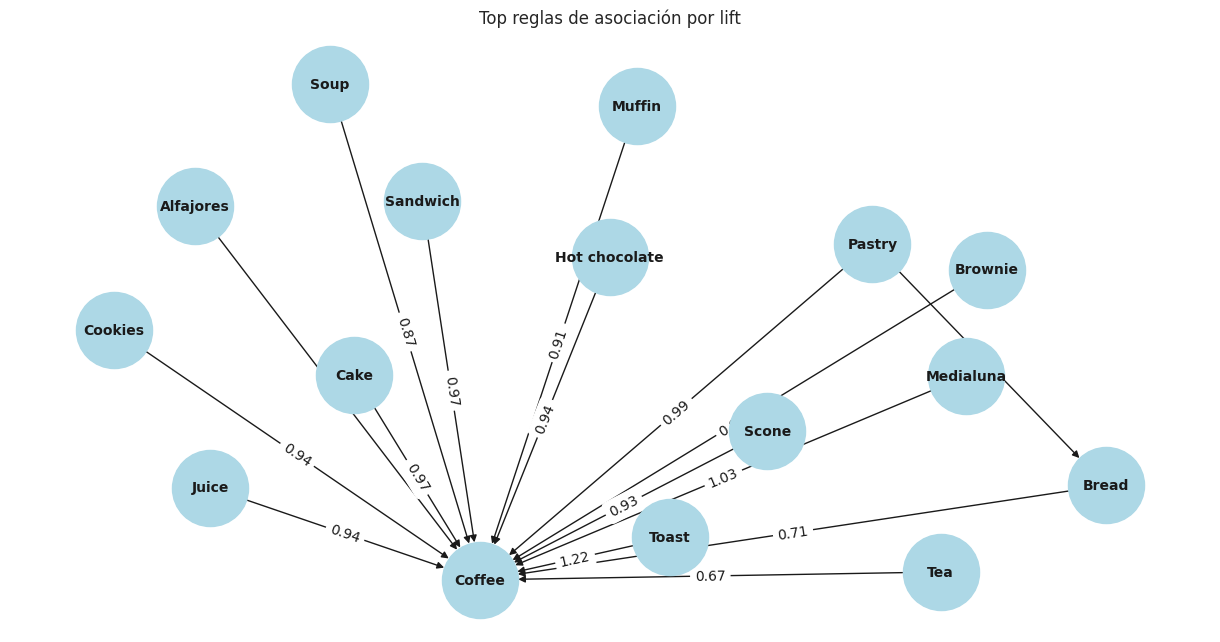

In [75]:
# Visualizamos
plot_rules(rules_apriori)

Casi todas las flechas, es decir, las reglas tienen como consecuente el café porque es el producto más vendido. De hecho la única que no termina en el café es la de Pastry $ \rightarrow $ Bread con un lift de 1.07.

Este gráfico serviría para que cualquier persona lo pueda interpretar sin tener que ser experta y por ejemplo para enseñarselo a la persona propietaria de la panadería.

### FP-Growth

In [76]:
#FP-Growth
# Ejecutamos FP-Growth con mismo soporte 2%
frequent_items_fpgrowth = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)

# Mostramos los primeros itemsets frecuentes
print("Itemsets frecuentes con FP-Growth:")
print(frequent_items_fpgrowth.head())

# Medimos el tiempo
%timeit fpgrowth(df_encoded, min_support=0.02, use_colnames=True)

Itemsets frecuentes con FP-Growth:
    support         itemsets
0  0.027783   (Scandinavian)
1  0.084205  (Hot chocolate)
2  0.080775        (Cookies)
3  0.603670         (Coffee)
4  0.338707          (Bread)
438 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


El tiempo es lo mas sorprendente de esta ejecucción porque como hemos explicado antes funciona con una estructura bastante eficiente, sin embargo es bastante más grande que el de apriori. Esto puede deberse a que realmente nuestro dataset filtrado es pequeño y en la práctica el apriori puede funcionar mucho más rápido si el problema no es complicado.

Se han generado también 47 reglas, por lo que genera un resultado parecido.  

In [77]:
# Itemsets frecuentes generados
print(f"Itemsets frecuentes generados: {len(frequent_items_fpgrowth)}")
print(frequent_items_fpgrowth.head())

Itemsets frecuentes generados: 47
    support         itemsets
0  0.027783   (Scandinavian)
1  0.084205  (Hot chocolate)
2  0.080775        (Cookies)
3  0.603670         (Coffee)
4  0.338707          (Bread)


In [78]:
# Reglas de asociación a partir de los itemsets frecuentes
# Usamos la confianza como métrica principal y establecemos un umbral mínimo de 0.3
rules_fpgrowth = association_rules(frequent_items_fpgrowth, metric="confidence", min_threshold=0.3)

# Mostramos cuántas reglas se han generado en total
print(f"Reglas generadas: {len(rules_fpgrowth)}")
rules_fpgrowth.head()

Reglas generadas: 16


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Hot chocolate),(Coffee),0.084205,0.603670,0.048019,0.570265,0.944663,1.0,-0.002813,0.922265,-0.060119,0.075047,-0.084287,0.324905
1,(Cookies),(Coffee),0.080775,0.603670,0.045790,0.566879,0.939054,1.0,-0.002972,0.915056,-0.065948,0.071697,-0.092829,0.321366
2,(Bread),(Coffee),0.338707,0.603670,0.146116,0.431392,0.714616,1.0,-0.058352,0.697018,-0.376518,0.183502,-0.434682,0.336719
3,(Pastry),(Coffee),0.129480,0.603670,0.077174,0.596026,0.987338,1.0,-0.000990,0.981079,-0.014518,0.117647,-0.019286,0.361934
4,(Pastry),(Bread),0.129480,0.338707,0.047333,0.365563,1.079290,1.0,0.003477,1.042330,0.084392,0.112469,0.040611,0.252655


Filtrando con un umbral de 0.3 para la confianza nos hemos quedado con solo 16 reglas. Salen productos que no salían en el apriori como es el chocolate claiente y las galletas. Sin embargo, no son las que más lift tienen.

In [79]:
rules_fpgrowth[rules_fpgrowth['confidence'] >= 0.5].sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15,(Toast),(Coffee),0.052135,0.60367,0.038415,0.736842,1.220604,1.0,0.006943,1.506054,0.190674,0.062222,0.336013,0.400239
5,(Medialuna),(Coffee),0.091579,0.60367,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099
3,(Pastry),(Coffee),0.129480,0.60367,0.077174,0.596026,0.987338,1.0,-0.000990,0.981079,-0.014518,0.117647,-0.019286,0.361934
11,(Sandwich),(Coffee),0.106157,0.60367,0.062082,0.584814,0.968765,1.0,-0.002002,0.954585,-0.034816,0.095843,-0.047576,0.343828
10,(Cake),(Coffee),0.152118,0.60367,0.088836,0.583991,0.967401,1.0,-0.002994,0.952696,-0.038224,0.133196,-0.049653,0.365575
12,(Alfajores),(Coffee),0.055222,0.60367,0.031898,0.577640,0.956880,1.0,-0.001437,0.938369,-0.045526,0.050875,-0.065678,0.315240
0,(Hot chocolate),(Coffee),0.084205,0.60367,0.048019,0.570265,0.944663,1.0,-0.002813,0.922265,-0.060119,0.075047,-0.084287,0.324905
1,(Cookies),(Coffee),0.080775,0.60367,0.045790,0.566879,0.939054,1.0,-0.002972,0.915056,-0.065948,0.071697,-0.092829,0.321366
8,(Juice),(Coffee),0.059167,0.60367,0.033442,0.565217,0.936302,1.0,-0.002275,0.911559,-0.067434,0.053134,-0.097022,0.310308
14,(Scone),(Coffee),0.051964,0.60367,0.029326,0.564356,0.934876,1.0,-0.002043,0.909757,-0.068450,0.046824,-0.099194,0.306468


In [80]:
rules_fpgrowth[rules_fpgrowth['lift'] > 1].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15,(Toast),(Coffee),0.052135,0.603670,0.038415,0.736842,1.220604,1.0,0.006943,1.506054,0.190674,0.062222,0.336013,0.400239
4,(Pastry),(Bread),0.129480,0.338707,0.047333,0.365563,1.079290,1.0,0.003477,1.042330,0.084392,0.112469,0.040611,0.252655
5,(Medialuna),(Coffee),0.091579,0.603670,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099


Las tres más destacadas son las mismas reglas que han salido para apriori. Vuelve a ser la predominante la regla de Toast  →  Coffe. Por tanto, es la regla más fuerte y que más segura podemos estar de ella. Hay otras reglas que aunque tengan un lift alto su confianza es baja como por ejemplo: Pastry  →  Bread. También es interesante la regla Medialuna  →  Coffee.

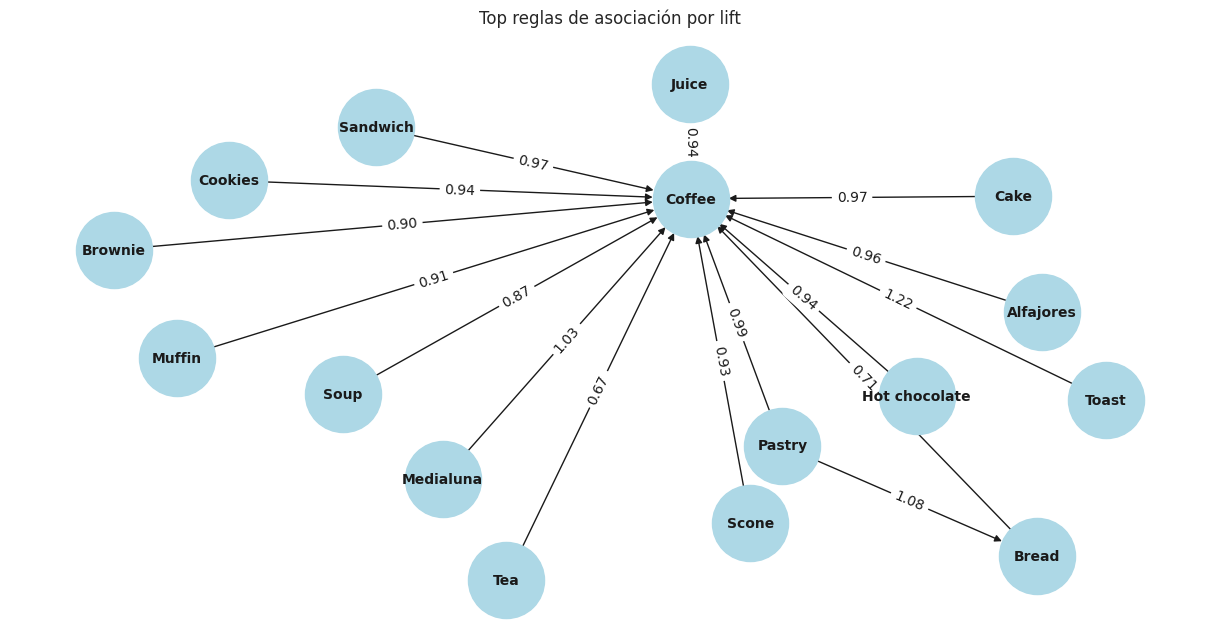

In [81]:
plot_rules(rules_fpgrowth)

Al igual que los resultados, el árbol es bastante parecido que con el otro algoritmo. Casi todas las reglas tienen como consecuente el café y solo hay una que es la que nos salido también con un lift alto: si alguien compra pasteles es probable que también compre pan.

## Selección y estimación de valores para hiperparámetros.


Como hemos elegido Apriori y FP-Growth, vamos a cambiar parámetros para jugar y ver que ocurre.

En Apriori:
> apriori(df_encoded,
        min_support=0.5,
        use_colnames=False,
        max_len=None,
        verbose=0,
        low_memory=False)

* min_support: el más importante. Es el umbral mínimo de soporte para considerar un itemset como frecuente. Al cambiarlo cambia drásticamente el número de itemsets. De hecho, cuanto más bajo es más itemsets se van a generar y por tanto, puede llegar a ser más lento y que las reglas no sean tan buenas. Probaremos con diferentes números.
* use_colnames: es un booleano que si es true, los itemsets se devuelven como nombres de productos y si es false, se devuelven como índices de columnas que son menos interpretables. Es mejor tenerlo a true para que sea más legible.
* max_len: entero o None que indica la longitud máxima de los itemsets que se generarán. Esto hará que se evite combinaciones excesivamente grandes. Nosotros lo dejaremos a None porque es un dataset pequeño.
* verbose: int (0 o 1) para mostrar mensajes durante la ejecucción. Lo vamos a dejar a 0 para que no imprima muchas cosas por pantalla.
* low_memory: booleano que si está a true es más eficiente en memoria. Es útil para cuando es costoso computacionalmente porque sea un dataset grande, el cual no es nuestro caso.

En FP-Growth:

> fpgrowth(df_encoded,
         min_support=0.5,
         use_colnames=False,
         max_len=None,
         verbose=0)

* min_support: al igual que en Apriori, es el parámetro más importante. Define el soporte mínimo para que un itemset sea considerado frecuente. A menor valor, se generarán más combinaciones, lo que puede ralentizar el proceso y dar lugar a reglas menos generales. Vamos a probarlo con distintos valores para ver cómo cambia la salida.

* use_colnames: si es true, los itemsets se devuelven como nombres de productos y por tanto es más legiblese. Si es false, se devuelven como índices de columnas. Usaremos true para que las reglas sean más interpretables.

* max_len: permite limitar la longitud máxima de los itemsets generados. Esto es útil si no queremos reglas con demasiados productos. Como nuestro dataset es pequeño, lo dejaremos en None, pero podríamos usar por ejemplo max_len=2 si quisiéramos solo pares de productos.

* verbose: si lo activamos (1), imprime mensajes informativos durante la ejecución. Lo dejaremos en 0 para evitar mensajes innecesarios en consola.

Este algoritmo no tiene el parámetro low_memory porque el FP-Tree ya está optimizada más eficientemente que Apriori sin generar candidatos explícitamente.



Vamos a probar a subir el mínimo soporte para que nos den reglas más frecuentes. Probamos con un soporte del 0.05, es decir, del 5%.

In [82]:
#Apriori
# Ejecutamos el algoritmo apriori con un soporte mínimo del 5% (cambio de hiperparametro)
frequent_items_apriori = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Mostramos los primeros itemsets frecuentes
print("Itemsets frecuentes con Apriori con soporte mínimo 0.05:")
print(frequent_items_apriori.head())

# Medimos el tiempo empleado
%timeit apriori(df_encoded, min_support=0.05, use_colnames=True)

Itemsets frecuentes con Apriori con soporte mínimo 0.05:
    support     itemsets
0  0.055222  (Alfajores)
1  0.338707      (Bread)
2  0.058995    (Brownie)
3  0.152118       (Cake)
4  0.603670     (Coffee)
5.21 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Tenemos los cinco productos más frecuentes, son iguales que con el 2%.

Es interesante como el tiempo baja bastante porque al aumentar el soporte míniom estamos procesando menos candidatos y por tanto, tarda bastante menos.

Generamos las reglas de asociación:


In [83]:
# Usamos los itemsets frecuentes obtenidos
rules_apriori = association_rules(frequent_items_apriori, metric="confidence", min_threshold=0.5)

# Vamos a ver las primeras reglas que se han generado
rules_apriori.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Cake),(Coffee),0.152118,0.60367,0.088836,0.583991,0.967401,1.0,-0.002994,0.952696,-0.038224,0.133196,-0.049653,0.365575
1,(Medialuna),(Coffee),0.091579,0.60367,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099
2,(Pastry),(Coffee),0.129480,0.60367,0.077174,0.596026,0.987338,1.0,-0.000990,0.981079,-0.014518,0.117647,-0.019286,0.361934
3,(Sandwich),(Coffee),0.106157,0.60367,0.062082,0.584814,0.968765,1.0,-0.002002,0.954585,-0.034816,0.095843,-0.047576,0.343828


Aquí he subido también el umbral de la confianza a 0.5, por eso también nos salen menos reglas. Tenemos una confianza alrededor del 60% y con un lift cercana a 1, por lo que nos hemos quedado con las reglas más confiables.

In [84]:
#Reglas con el lift alto
rules_apriori[rules_apriori['lift'] > 1].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Medialuna),(Coffee),0.091579,0.60367,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099


Solo nos ha generado una regla con un lift mayor de 1: Medialuna $ \rightarrow $ Coffe. Es la única que tiene una confianza alta y un soporte razonable por lo que es una de las mejores.

Vamos a dibujar un grafo dirigido donde cada nodo es un producto de nuestra panadería y cada flecha es una regla de asociación como las estudiadas con antecedente y consecuente. Los números de cada flecha es el valor que tiene el lift. Es interesante para verlo visualmente.

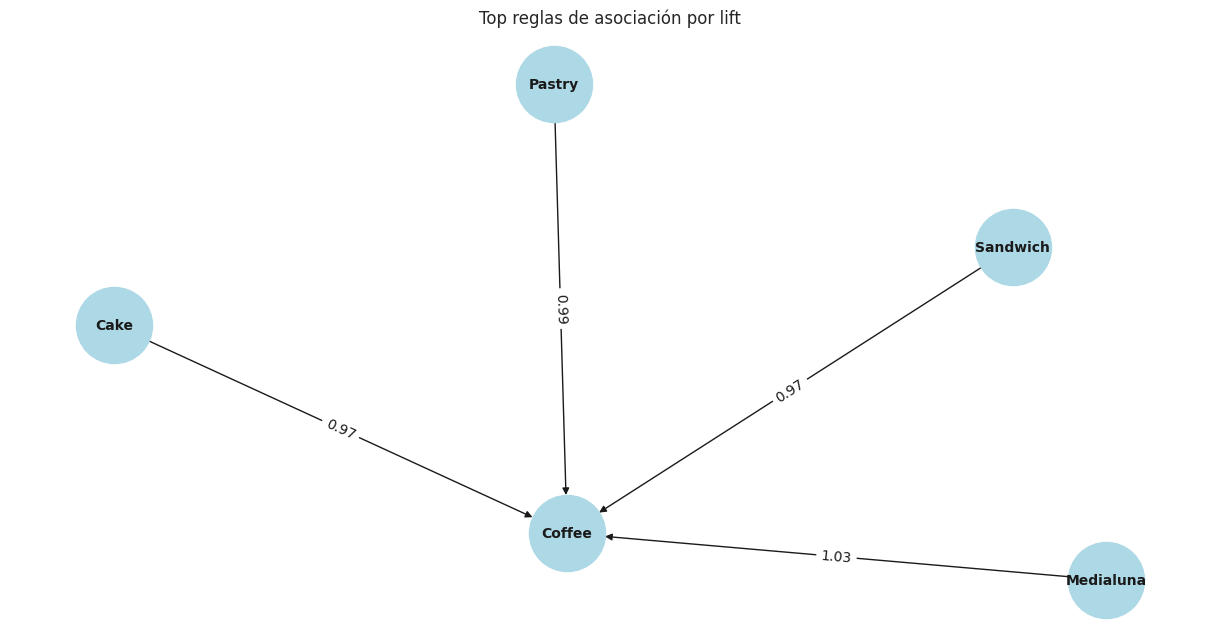

In [85]:
# Visualizamos
plot_rules(rules_apriori)

Vemos como este gráfico es mucho más pequeño porque hemos subido el soporte mínimo, lo que es lógico. Al igual que antes todas las reglas tienen como consecuente el café porque es el producto más vendido. Son cercanas todas a 1 de lift, lo que son bastante aceptables.

Para el caso de FP-Growth vamos a hacer lo contrario, vamos a bajar el soporte mínimo y veremos a ver si lo que ocurre es lógico y esperable.

In [86]:
#FP-Growth
# Ejecutamos FP-Growth con mismo soporte 1%
frequent_items_fpgrowth = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Mostramos los primeros itemsets frecuentes
print("Itemsets frecuentes con FP-Growth:")
print(frequent_items_fpgrowth.head())

# Medición de tiempo
%timeit fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

Itemsets frecuentes con FP-Growth:
    support         itemsets
0  0.027783   (Scandinavian)
1  0.084205  (Hot chocolate)
2  0.080775        (Cookies)
3  0.018179            (Jam)
4  0.603670         (Coffee)
1.16 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Sube mucho más el tiempo porque estamos dejando más reglas y por tanto es menos eficiente. Era esperable.

In [87]:
print(f"Itemsets frecuentes generados: {len(frequent_items_fpgrowth)}")
print(frequent_items_fpgrowth.head())

Itemsets frecuentes generados: 95
    support         itemsets
0  0.027783   (Scandinavian)
1  0.084205  (Hot chocolate)
2  0.080775        (Cookies)
3  0.018179            (Jam)
4  0.603670         (Coffee)


Se han generado el doble de reglas, lo que era esperable ya que aparecen reglas más raras.

In [88]:
rules_fpgrowth = association_rules(frequent_items_fpgrowth, metric="confidence", min_threshold=0.3)
print(f"Reglas generadas: {len(rules_fpgrowth)}")
rules_fpgrowth.head()

Reglas generadas: 31


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Scandinavian),(Bread),0.027783,0.338707,0.010633,0.382716,1.129933,1.0,0.001223,1.071295,0.118278,0.029880,0.066550,0.207054
1,(Hot chocolate),(Coffee),0.084205,0.603670,0.048019,0.570265,0.944663,1.0,-0.002813,0.922265,-0.060119,0.075047,-0.084287,0.324905
2,"(Hot chocolate, Cake)",(Coffee),0.018522,0.603670,0.011147,0.601852,0.996988,1.0,-0.000034,0.995433,-0.003069,0.018243,-0.004588,0.310159
3,(Cookies),(Coffee),0.080775,0.603670,0.045790,0.566879,0.939054,1.0,-0.002972,0.915056,-0.065948,0.071697,-0.092829,0.321366
4,(Bread),(Coffee),0.338707,0.603670,0.146116,0.431392,0.714616,1.0,-0.058352,0.697018,-0.376518,0.183502,-0.434682,0.336719


In [89]:
rules_fpgrowth[rules_fpgrowth['lift'] > 1].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
28,(Toast),(Coffee),0.052135,0.603670,0.038415,0.736842,1.220604,1.0,0.006943,1.506054,0.190674,0.062222,0.336013,0.400239
0,(Scandinavian),(Bread),0.027783,0.338707,0.010633,0.382716,1.129933,1.0,0.001223,1.071295,0.118278,0.029880,0.066550,0.207054
29,(Salad),(Coffee),0.015606,0.603670,0.010633,0.681319,1.128628,1.0,0.001212,1.243656,0.115775,0.017470,0.195919,0.349466
6,(Pastry),(Bread),0.129480,0.338707,0.047333,0.365563,1.079290,1.0,0.003477,1.042330,0.084392,0.112469,0.040611,0.252655
8,(Medialuna),(Coffee),0.091579,0.603670,0.057109,0.623596,1.033007,1.0,0.001825,1.052936,0.035174,0.089492,0.050275,0.359099
30,(Spanish Brunch),(Coffee),0.028812,0.603670,0.017664,0.613095,1.015613,1.0,0.000272,1.024361,0.015829,0.028731,0.023781,0.321178


Volvemos a ver como el café es casi siempre el consecuente pero hemos encontrado una regla que antes no nos ha salido: Scandinavian implica Bread. Tiene un lift alto, por tanto, este cambio de hiperparámetro me sirve para ver reglas diferentes que antes no habían salido.

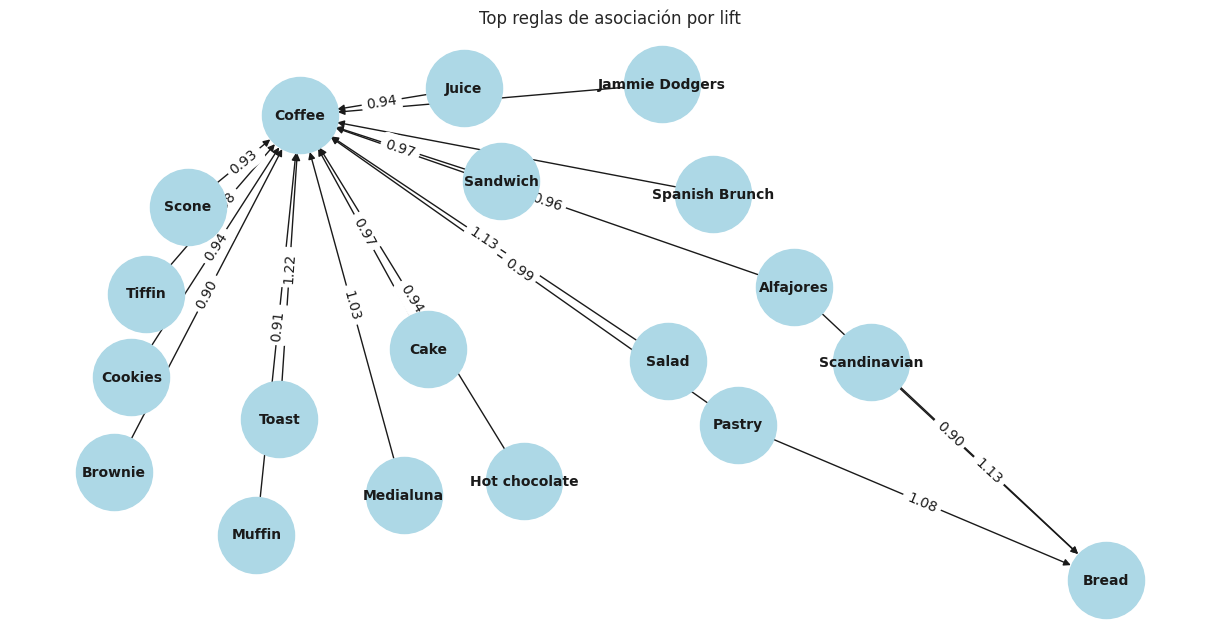

In [90]:
plot_rules(rules_fpgrowth)

Vemos como el grafo es mucho más grande porque hemos obtenido muchas más reglas aunque no nos quedamos con las más confiables. Aun así, nos han salido reglas más raras que antes no nos habían salido y puede ser también interesantes estudiarlas.

## Entrenamiento y estimación del error fuera de la muestra.

Lo hemos realizado ya arriba.

##  Discusión de resultados y extracción de conclusiones

Hemos visto como las reglas generadas con los dos algoritmos son bastate parecias. Siempre predomina el café como consecuente porque es el producto más comprado con diferencia.

En cuanto a la comparación entre algoritmos, la diferencia más grande es la del tiempo, que debería de ser más rápido el FP-Growth por su estructura jerárquica eficiente pero no es así. Esto probablemente se debe a que el conjunto de datos es pequeño y Apriori puede resolverlo eficientemente sin necesidad de estructuras complejas.

Estas reglas pueden ayudar mucho al dueño de la panadería porque así puede saber que es lo que vende más y lo que vende menos. Para marketing puede ser muy interesante ya que puedes saber que productos se compran juntos habitualmente y que combinaciones tienen potencial.

Las reglas que más predominan son:
* Toast  →  Coffe: si compra tostada es bastante probable que compre café.  
* Pastry  →  Bread: si compra pasteles es bastante probable que compre pan.
* Medialuna  →  Coffee: si compra una medialuna es bastante probable que compre café.